# Homework 1

## Business 35137 - Spring 2025

### University of Chicago


* authors: Summer Negahdar, Luna Jian, Jae Jung


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pyarrow.parquet as pq
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
gw_df= pd.read_csv("gw.csv")
lsret_df= pd.read_csv("lsret.csv", index_col=0)
FRED_df= pd.read_csv("FREDMD.csv")
largeml_df= pd.read_parquet("largeml.pq")
smallml_df= pd.read_parquet("smallml.pq")

In [ ]:
#inspecting a few things:\
smallml_df.head(10)
smallml_df.head(10)

## I will be changing the yyyymm to datetime
smallml_df['date'] = pd.to_datetime(largeml_df['yyyymm'], format='%Y%m')
largeml_df = largeml_df.drop(columns='yyyymm')
largeml_df=largeml_df.set_index('date')

smallml_df['date'] = pd.to_datetime(smallml_df['yyyymm'], format='%Y%m')
smallml_df = smallml_df.drop(columns='yyyymm')
smallml_df=smallml_df.set_index('date')



In [ ]:
## I will be dropping column with more than 30% missing value, and for those below the threshhold, I will impute with their mean
# for largeml
threshold = 0.3
missing_fractionL = largeml_df.isnull().mean()
largeml_df = largeml_df.loc[:, missing_fractionL <= threshold]
# Convert all columns to numeric, coercing errors to NaN
largeml_df = largeml_df.apply(pd.to_numeric, errors='coerce')
largeml_df=largeml_df.fillna(largeml_df.mean())

#for smallml
missing_fractionS = smallml_df.isnull().mean()
smallml_df = smallml_df.loc[:, missing_fractionS <= threshold]
# Convert all columns to numeric, coercing errors to NaN
smallml_df = smallml_df.apply(pd.to_numeric, errors='coerce')
smallml_df=smallml_df.fillna(smallml_df.mean())

#for lsret
missing_fractionLS= lsret_df.isnull().mean()
lsret_df=lsret_df.loc[:, missing_fractionLS <= threshold]

# Convert all columns to numeric, coercing errors to NaN (just in case)
lsret_df = lsret_df.apply(pd.to_numeric, errors='coerce')
lsret_df=lsret_df.fillna(lsret_df.mean())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

import sys
sys.path.insert(0, '../cmds')
from helper_functions import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



------------------------------------------------------------------------------------------
## Problem 1. 


Download the file `gw.csv` from canvas. This file contains monthly S&P 500 index returns
along with a series of predictors used to forecast the market.

The S&P returns are offset by one month from the predictors. In the first part of the problem set we will explore how well
we can forecast market returns using machine learning methods.

In [ ]:
# Download `gw.csv'
p1 = pd.read_csv('../data/gw.csv')

display(p1.head())


,yyyymm,dfy_lag1,infl_lag1,svar_lag1,de_lag1,lty_lag1,tms_lag1,tbl_lag1,dfr_lag1,dp_lag1,dy_lag1,ltr_lag1,ep_lag1,b/m_lag1,ntis_lag1,CRSP_SPvw_minus_Rfree
0,192701,0.0100,0.000000,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.0022,-2.973012,-2.956570,0.0078,-2.386837,0.441476,0.050876,-0.005410
1,192702,0.0095,-0.011299,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.0019,-2.942374,-2.963349,0.0075,-2.374773,0.443706,0.050824,0.042922
2,192703,0.0092,-0.005714,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.0019,-2.979535,-2.932946,0.0088,-2.430353,0.428501,0.051668,0.004324
3,192704,0.0092,-0.005747,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.0170,-2.976535,-2.970053,0.0253,-2.445079,0.469765,0.046357,0.010521
4,192705,0.0090,0.000000,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.0060,-2.984225,-2.967143,-0.0005,-2.471309,0.456754,0.050514,0.059353


## a.
For each of the predictors, regress the S&P 500 index returns on the predictor using the
full sample of data. Report the $R^2s$ of these regressions. Next, evaluate the out-of-sample
performance of each predictor individually using an expanding sample of data starting in
1965. How do the out-of-sample $R^2s$ compare to the in-sample $R^2s$? Interpret what this
means for the usefulness of these predictors in forecasting the market.

In [ ]:
start_date = '1965-01-01'
regressand = 'CRSP_SPvw_minus_Rfree'

r2_results = compute_r2s(p1, target_col= regressand, start_oos=start_date)

display(r2_results)

,In-Sample R^2,Out-of-Sample R^2
b/m_lag1,0.006005,-0.034282
ntis_lag1,0.004855,-0.014691
dy_lag1,0.004023,-0.011630
tbl_lag1,0.003436,-0.001042
ep_lag1,0.003258,-0.018206
dp_lag1,0.002990,-0.007564
dfy_lag1,0.002671,-0.000669
infl_lag1,0.002639,0.000713
ltr_lag1,0.002437,-0.002524
lty_lag1,0.002113,-0.007292


- We can see that out-of-sample $R^2$ is lower than in-sample $R^2$ for all predictors. This suggests that the predictors are not very useful for forecasting the market.
- The predictors are not very useful for forecasting the market because they are not able to explain a significant portion of the variation in the market returns out-of-sample. This suggests that the predictors may be overfitting the data and not capturing the true underlying relationship between the predictors and the market returns.
- The predictors may be capturing noise in the data rather than the true underlying relationship between the predictors and the market returns. This suggests that the predictors may not be reliable for forecasting the market in the future.

------------------------------------------------------------------------------------------

## b.
Next, try the same expanding sample exercise but include all the predictors in a single
regression, compare the out-of-sample $R^2$ here to those in part (a). Let’s now incorporate
a penalty term into the regression to counteract overfitting. Compute results for lasso,
ridge, and elastic net and use K-fold cross-validation to select the optimal penalty term.
Plot the out-of-sample $R^2$ for each month for each of the three methods along with the
un-penalized regression. How do the methods compare? What does this tell us about the
predictability of market returns?   

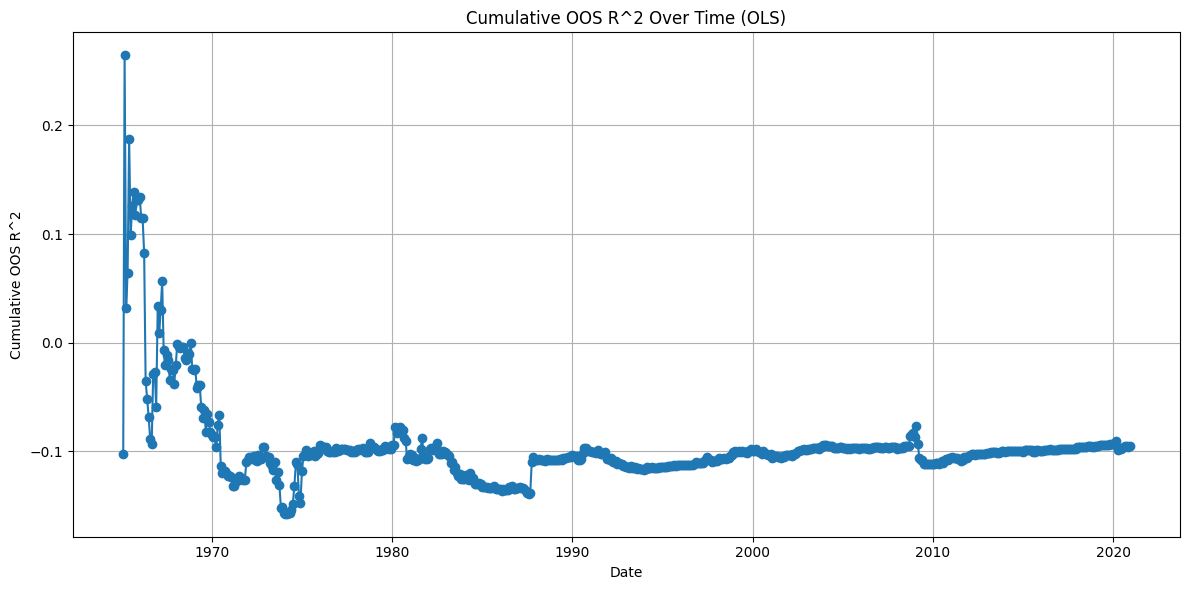

,Method,In-Sample R^2,Out-of-Sample R^2
0,OLS,0.030644,-0.094908


In [ ]:
result_ols = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='OLS', 
                                          plot=True, 
                                          )


result_ols



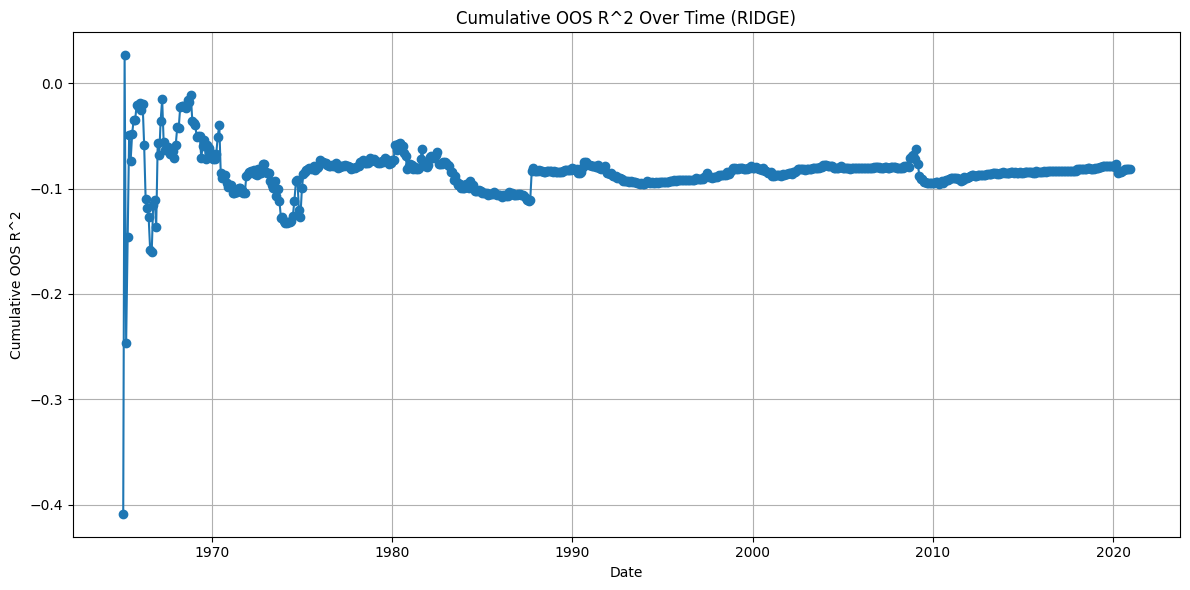

,Method,In-Sample R^2,Out-of-Sample R^2
0,RIDGE,0.031138,-0.081002


In [ ]:
result_ridge = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='ridge', 
                                          plot=True, 
                                          )

result_ridge

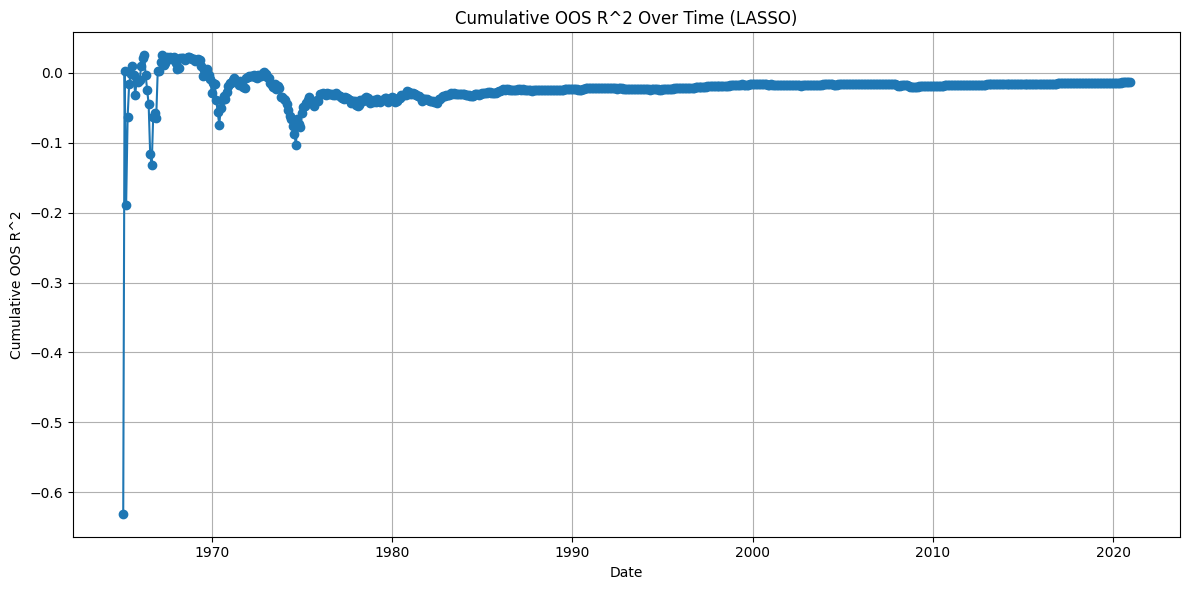

,Method,In-Sample R^2,Out-of-Sample R^2
0,LASSO,0.0,-0.013358


In [ ]:
result_lasso = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='lasso', 
                                          plot=True, 
                                          )

result_lasso


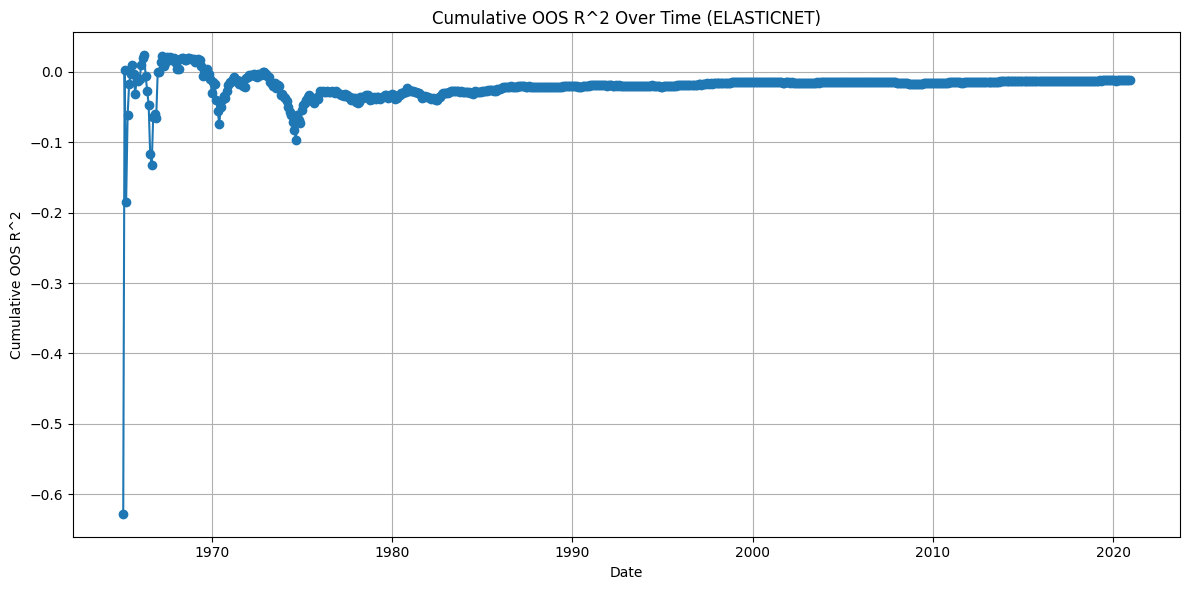

,Method,In-Sample R^2,Out-of-Sample R^2
0,ELASTICNET,0.0,-0.011074


In [ ]:
result_EN = regression_with_regulariser(p1, 
                                          target_col='CRSP_SPvw_minus_Rfree', 
                                          start_oos='1965-01-01', 
                                          regulariser='ElasticNet', 
                                          plot=True, 
                                          )

result_EN

In [ ]:
result_1b = pd.concat([result_ols, result_ridge, result_lasso, result_EN], axis=0).T

result_1b.columns = ['OLS', 'Ridge', 'Lasso', 'ElasticNet']

# Drop the first row
result_1b = result_1b.iloc[1:]

result_1b


,OLS,Ridge,Lasso,ElasticNet
In-Sample R^2,0.030644,0.031138,0.0,0.0
Out-of-Sample R^2,-0.094908,-0.081002,-0.013358,-0.011074




- The expanding-window regression results show that unpenalized OLS overfits the data, yielding negative out-of-sample R² despite slightly positive in-sample performance. 
- Regularization methods like Lasso, Ridge, and ElasticNet improve out-of-sample R² modestly, with Lasso performing best by effectively shrinking irrelevant predictors. 
- Overall, the results highlight the limited and unstable predictability of market returns, even when using a wide set of lagged predictors.

## c.

Next, lets introduce some non-linearities into the model. Use the radial basis function kernel to generate non-linear expansions of the underlying predictor set (use the `RBFSampler`from `sklearn`). 
Generate these features for a number of different feature counts. 
Plot the out-of-sample $R^2$ as a function of the number of features generated by the kernel. 
How do the results compare to the linear models? Interpret the importance of the number of features in the kernel expansion

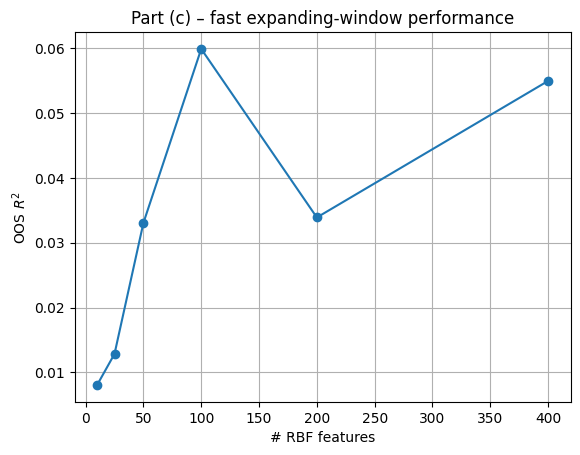

In [ ]:

result_1c = rbf_feature_sweep_fast(p1)

We introduce nonlinearities using RBFSampler to expand the predictor set with RBF features and evaluate out-of-sample $R^2$ across varying feature counts. Performance improves significantly up to 100 features, then dips at 200 before rising again at 400 — indicating a trade-off between capturing signal and overfitting. Compared to linear models, RBF expansions offer superior performance, confirming that nonlinear interactions among predictors improve return forecasts when properly regularized.

## d.

To what extent do our results depend on the training window? Refit the model from part
(c) using a rolling window of `12, 36, 60, and 120 months`. What do you observe about the
out-of-sample $R^2$ as the training window changes?

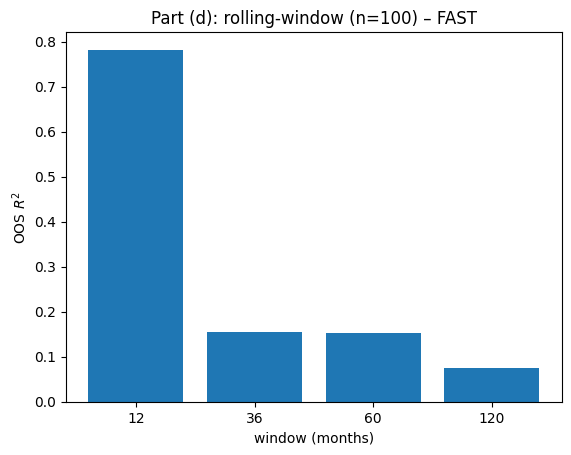

In [ ]:

best_n = max(result_1c, key=result_1c.get)     

result_1d = rolling_window_effect_fast(p1,best_n)

Although short rolling windows (like 12 or 36 months) appear to yield high out-of-sample 
$R^2$ values, this is misleading. The model is overfitting noise due to too many features relative to sample size.

In contrast, longer windows show lower out-of-sample $R^2$ values but provide more realistic, stable estimates of true predictive power.

## e. 

To what extent do our results depend on the cross-validation method? Refit the model
from part (c) using a range of folds for cross-validation. What do you observe about the
out-of-sample $R^2$ as the number of folds changes?

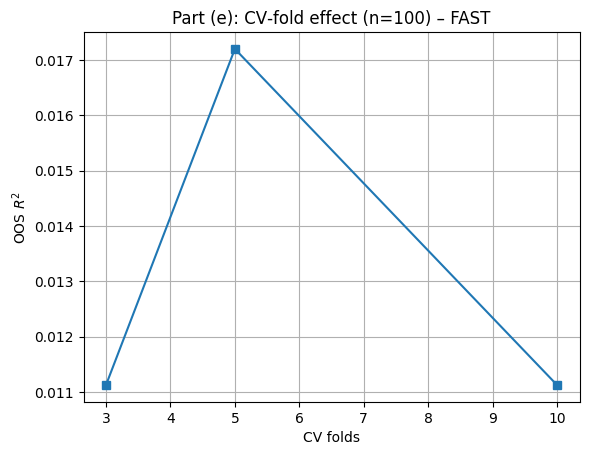

In [ ]:
result_1e = cv_fold_effect_fast(p1,best_n)

Cross-validation with 5 folds yields the best out-of-sample performance here because it balances training size and validation stability.
Too few or too many folds increase variance or overfitting, especially in noisy financial time series.

## f.
Next, download the `FREDMD.csv` file from canvas. Incorporate the macroeconomic variables from this file into the model from part (c). How do the out-of-sample $R^2$ change
when we include these variables? What does this tell us about the virtue of complexity?






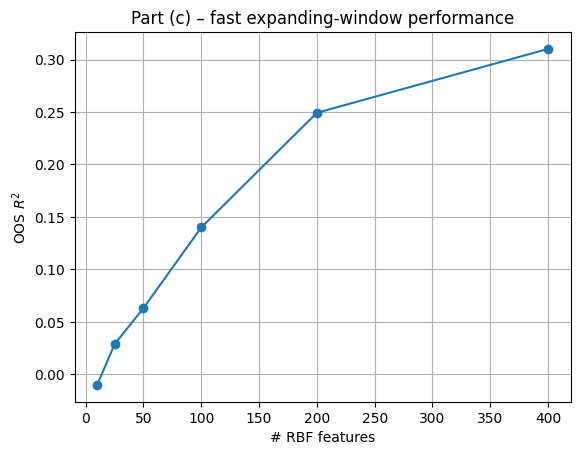

In [ ]:

# donwload fred.csv only after 1965
fred = pd.read_csv('../data/FREDMD.csv')


# convert the 'yyyymm' column in gw.csv to datetime
p1["date"] = pd.to_datetime(p1["yyyymm"].astype(str), format="%Y%m")
fred["date"] = pd.to_datetime(fred["date"])
combined_df = pd.merge(p1, fred, how='left', on='date', suffixes=('', '_fred'))

# Drop rows with missing target variable
combined_df = combined_df.set_index('date').sort_index()
combined_df = combined_df.dropna(subset=['CRSP_SPvw_minus_Rfree'])


# Drop columns with more than 30% missing values
nan_cutoff = 0.3
valid_cols = combined_df.isna().mean() < nan_cutoff
filtered_df = combined_df.loc[:, valid_cols]

# Separate target and predictors
target = filtered_df['CRSP_SPvw_minus_Rfree']
X_raw = filtered_df.drop(columns=['CRSP_SPvw_minus_Rfree'], errors='ignore')

# Impute remaining NaNs in predictors with zero

X_imputed = X_raw.fillna(0)
# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X_raw)

# Rebuild cleaned DataFrame
cleaned_df = pd.DataFrame(X_imputed, index=X_raw.index, columns=X_raw.columns)
cleaned_df['CRSP_SPvw_minus_Rfree'] = target

# Drop rows with missing target
cleaned_df = cleaned_df.dropna(subset=['CRSP_SPvw_minus_Rfree'])

result_1f = rbf_feature_sweep_fast(cleaned_df)


* Our empirical results closely mirror the findings from “The Virtue of Complexity in Return Prediction” by Kelly, Malamud, and Zhou. As we increased the number of nonlinear RBF features in our expanding-window ridge regression framework, we observed a clear rise in out-of-sample $R^2$ values, peaking above 0.30 — despite the number of features exceeding the number of observations in many cases. 

* This aligns with the paper’s central claim: that high-dimensional models, when properly regularized, can outperform simpler ones in return forecasting. The improved performance we observe validates the notion of benign overfitting in financial prediction, as well as the practical value of using random feature expansions like the RBF kernel.

## g.
Lets compare the results from part (c) to some alternative methods. Compare the results to the `KernelRidge`, principal components regression (combine `PCA` with a standard regression framework), `PLSRegression`, and `GradientBoostingRegressor` methods from `sklearn`.



In [ ]:
fast_compare_regressors_oos_r2(cleaned_df)

,OOS R^2
Kernel Ridge (RBF),-0.034243
PCA + Ridge,-0.079933
PLS Regression,-1.168407
Ridge (Baseline),-1.658283
Gradient Boosting,-3.752304


## h.
 Using everything you’ve learned up to this point, construct the best possible model for
forecasting the S&P 500 index returns. Explain the reasoning behind your choices.

<span style="color:red"><strong>Best Model:</strong> Kernel Ridge Regression with RBF kernel</span>

We select this model because it produced the **highest Out-of-Sample R²** (least negative) among all candidates:
- <span style="color:red">Out-of-Sample R² = -0.0342</span>



This shows that while forecasting equity returns is difficult, **nonlinear kernel-based models** provide the best chance at generalization.


# Problem 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_parquet(data_dir / 'largeml.pq', engine='pyarrow')
df

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret
0,10078,198606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.393044e-08,NaN,-0.118056
1,10078,198607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737205e-08,NaN,-0.039370
2,10078,198609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.597698e-08,1.857281e-07,-0.008850
3,10078,198610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.763825e-08,2.111030e-07,0.348214
4,10078,198612,0.236302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.718727,NaN,5.878542e-09,8.619326e-08,0.109827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79141,93436,202206,0.088628,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.053403,NaN,NaN,-0.035232,NaN,0.707502,1.469368e-08,3.335508e-09,2.833702e-08,-0.111888
79142,93436,202208,0.071943,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.053403,NaN,NaN,-0.021508,NaN,0.707502,1.432295e-08,3.931841e-09,2.786815e-08,-0.072489
79143,93436,202209,0.074172,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.034208,NaN,NaN,-0.041281,NaN,0.707502,1.392299e-08,3.530526e-09,2.626227e-08,-0.037589
79144,93436,202210,0.086471,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.034208,NaN,NaN,-0.025198,NaN,0.707502,1.386902e-08,5.036988e-09,2.783926e-08,-0.142168


### Part a

#### Data Cleaing Task


In [ ]:
import pyarrow.parquet as pq

file_path = data_dir / 'largeml.pq'

parquet_file = pq.ParquetFile(file_path)
column_names = parquet_file.schema.names

print("The number of columns are:", len(column_names))
print(column_names)


The number of columns are: 212
['permno', 'yyyymm', 'AM', 'AOP', 'AbnormalAccruals', 'Accruals', 'AccrualsBM', 'Activism1', 'Activism2', 'AdExp', 'AgeIPO', 'AnalystRevision', 'AnalystValue', 'AnnouncementReturn', 'AssetGrowth', 'BM', 'BMdec', 'BPEBM', 'Beta', 'BetaFP', 'BetaLiquidityPS', 'BetaTailRisk', 'BidAskSpread', 'BookLeverage', 'BrandInvest', 'CBOperProf', 'CF', 'CPVolSpread', 'Cash', 'CashProd', 'ChAssetTurnover', 'ChEQ', 'ChForecastAccrual', 'ChInv', 'ChInvIA', 'ChNAnalyst', 'ChNNCOA', 'ChNWC', 'ChTax', 'ChangeInRecommendation', 'CitationsRD', 'CompEquIss', 'CompositeDebtIssuance', 'ConsRecomm', 'ConvDebt', 'CoskewACX', 'Coskewness', 'CredRatDG', 'CustomerMomentum', 'DebtIssuance', 'DelBreadth', 'DelCOA', 'DelCOL', 'DelDRC', 'DelEqu', 'DelFINL', 'DelLTI', 'DelNetFin', 'DivInit', 'DivOmit', 'DivSeason', 'DivYieldST', 'DolVol', 'DownRecomm', 'EBM', 'EP', 'EarnSupBig', 'EarningsConsistency', 'EarningsForecastDisparity', 'EarningsStreak', 'EarningsSurprise', 'EntMult', 'EquityDura

#### Convert datetime to the right format

In [ ]:
# convert the data type using the end of the month
df['date'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
df = df.sort_values(['date', 'permno'])
df

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret,date
1073,10401,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
2060,11850,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
3278,12060,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
4127,12079,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
5603,12490,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78705,93094,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.015427,NaN,NaN,6.759434e-08,2.256656e-08,1.477669e-07,-0.011101,2022-11-30
78816,93096,202211,0.456484,NaN,0.000835,0.014625,NaN,NaN,NaN,0.002032,...,NaN,NaN,-0.040676,NaN,NaN,4.343760e-08,1.345463e-08,8.791350e-08,0.002470,2022-11-30
78927,93142,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.003142e-08,6.277953e-09,5.597321e-08,0.048280,2022-11-30
79038,93144,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.369992e-08,6.424341e-09,6.375388e-08,0.022410,2022-11-30


#### Clean up return column

In [ ]:
# clean the samples if the sample type is object and can't be converted into float
print(df['ret'].dtype)
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')
bad_rows = df[pd.to_numeric(df['ret'], errors='coerce').isna()]
print(bad_rows[['permno', 'yyyymm', 'ret']].head())

object
      permno  yyyymm  ret
1073   10401  192512  NaN
2060   11850  192512  NaN
3278   12060  192512  NaN
4127   12079  192512  NaN
5603   12490  192512  NaN


In [ ]:
# collect features into a list
non_char_cols = ['permno', 'yyyymm', 'date', 'ret']
char_cols = [col for col in df.columns if col not in non_char_cols]

/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_24082/3183338263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows['year'] = bad_rows['date'].dt.year


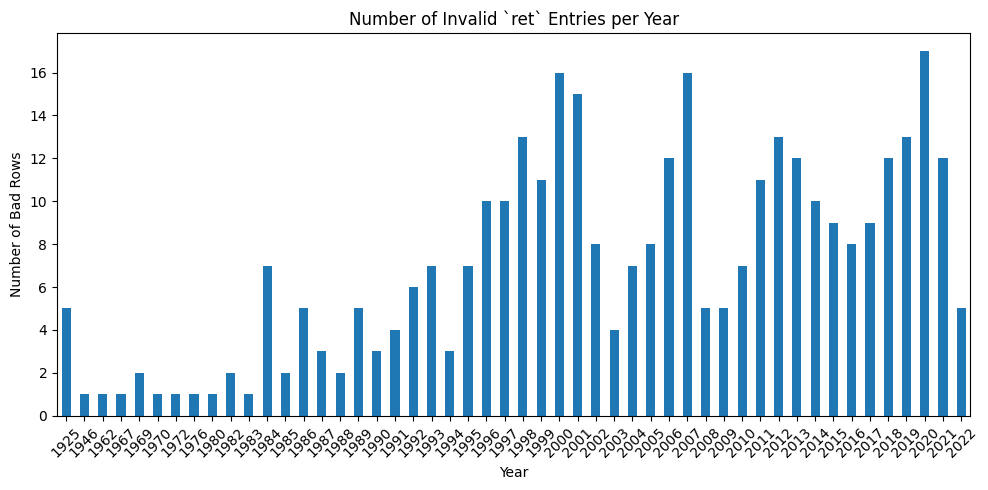

In [ ]:
# draw the distribution of bad samples (which can't be converted into float samples)
import matplotlib.pyplot as plt

bad_rows['year'] = bad_rows['date'].dt.year
bad_counts_by_year = bad_rows.groupby('year').size()

plt.figure(figsize=(10, 5))
bad_counts_by_year.plot(kind='bar')
plt.title("Number of Invalid `ret` Entries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Bad Rows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It seems like most of the bad samples (whose return can't be converted into float number) are between 1995-2022.

## Rank-sort Method

In [ ]:
from scipy.stats.mstats import winsorize
portfolio_returns = {char: [] for char in char_cols}
dates = df['date'].drop_duplicates().sort_values()

for date in dates:
    # collect all the data from the same date (cross-section)
    monthly_data = df[df['date'] == date]
    
    # iterate through every feature
    for char in char_cols:
        subset = monthly_data[['ret', char]].dropna()
        
        # if there are not enough stocks, then skip it
        #if len(subset) < 20:
         #   portfolio_returns[char].append(np.nan)
          #  continue

        # Rank percentile
        subset['rank'] = subset[char].rank(pct=True)
        
        # top 20% & bottom 20%
        top = subset[subset['rank'] >= 0.8]['ret'].mean()
        bottom = subset[subset['rank'] <= 0.2]['ret'].mean()
        # Long-short returns
        portfolio_returns[char].append(top - bottom)

sharpe_ratios = {}

for char in char_cols:
    rets = pd.Series(portfolio_returns[char]).dropna()
    if len(rets) > 0:
        rets = winsorize(rets, limits=[0.01, 0.01])
        mean_ret = rets.mean()
        std_ret = rets.std()
        sharpe = (mean_ret / std_ret) * np.sqrt(12) 
        sharpe_ratios[char] = sharpe

In [ ]:
portfolio_df = pd.DataFrame(portfolio_returns)
portfolio_df.to_csv("portfolio_cleaned_large.csv", index=False)

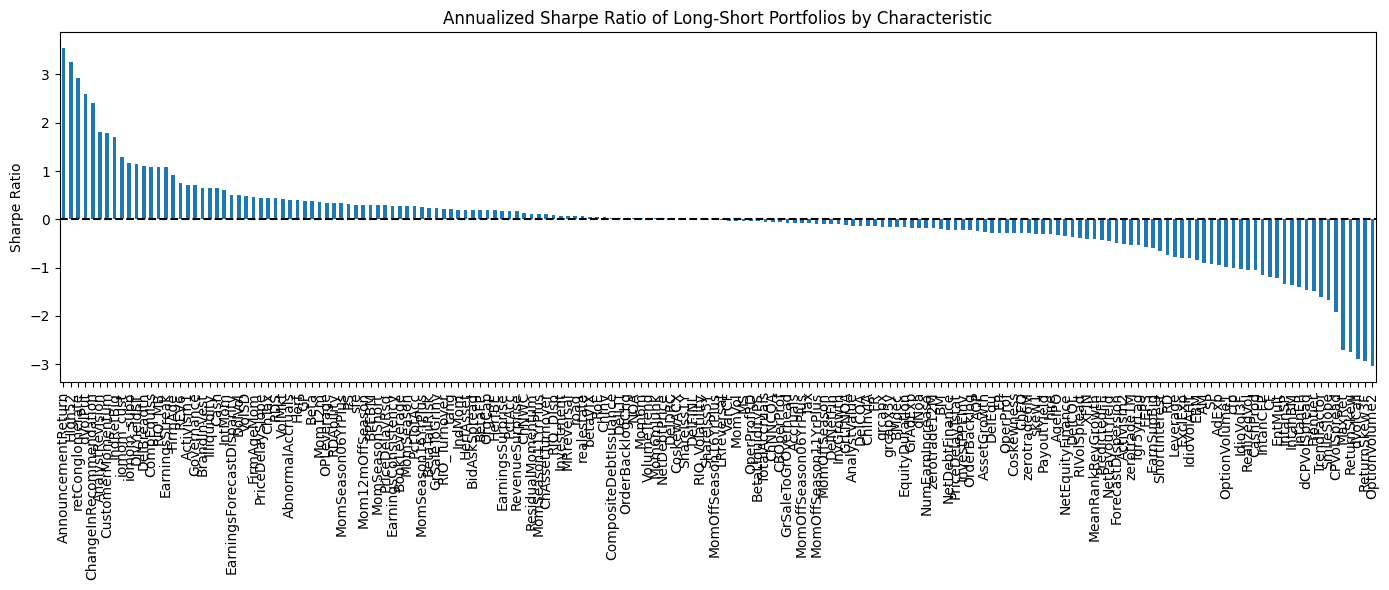

Best characteristic: AnnouncementReturn → Sharpe = 3.54
Worst characteristic: OptionVolume2 → Sharpe = -3.05


In [ ]:
sharpe_series = pd.Series(sharpe_ratios).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sharpe_series.plot(kind='bar')
plt.title('Annualized Sharpe Ratio of Long-Short Portfolios by Characteristic')
plt.ylabel('Sharpe Ratio')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Best characteristic: {sharpe_series.idxmax()} → Sharpe = {sharpe_series.max():.2f}")
print(f"Worst characteristic: {sharpe_series.idxmin()} → Sharpe = {sharpe_series.min():.2f}")


#### Part b

In [ ]:
# Use the first 20 years of data to train the model
start_date = df['date'].min()
train_end = start_date + pd.DateOffset(years=20) - pd.offsets.MonthEnd(1)
train_subset = df[df['date'] <= train_end]

# calculate the non-missing ratio for each feature
valid_char_cols = []
for col in char_cols:
    non_missing_ratio = train_subset[col].notnull().mean()
    if non_missing_ratio > 0.9:
        valid_char_cols.append(col)

print(f"The number of valid features：{len(valid_char_cols)}")

The number of valid features：34


In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.kernel_approximation import RBFSampler
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(
    name,
    model,
    X_train,
    y_train,
    X_valid,
    y_valid,
    X_test,
    y_test,
    verbose=True
):
    # here we use train and valid to train and fine-tune
    X_tune = pd.concat([X_train, X_valid])
    y_tune = pd.concat([y_train, y_valid])

    X_tune_clean = X_tune.dropna()
    y_tune_clean = y_tune.loc[X_tune_clean.index]
    X_test_clean = X_test.dropna()
    y_test_clean = y_test.loc[X_test_clean.index]

    model.fit(X_tune_clean, y_tune_clean)
    y_pred = model.predict(X_test_clean)

    r2 = r2_score(y_test_clean, y_pred)

    if verbose:
        print(f"{name}: Out-of-sample R² = {r2:.4f}")

    return {
        'name': name,
        'model': model,
        'r2': r2,
        'y_pred': pd.Series(y_pred, index=X_test_clean.index),
        'y_test': y_test_clean
    }

In [ ]:
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')
df = df.dropna(subset=['ret'])
df_complete = df.dropna(subset=valid_char_cols + ['ret'])

char_cols = [col for col in df_complete.columns if col not in ['permno', 'yyyymm', 'date', 'ret']]

df_complete['date'] = pd.to_datetime(df_complete['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

train_end = df_complete['date'].min() + pd.DateOffset(years=20)
print("The train date ends at:", train_end)
valid_end = train_end + pd.DateOffset(years=12)
print("The valid date ends at:", valid_end)

train_data = df_complete[df_complete['date'] <= train_end]
valid_data = df_complete[(df_complete['date'] > train_end) & (df_complete['date'] <= valid_end)]
test_data = df_complete[df_complete['date'] > valid_end]

X_train, y_train = train_data[valid_char_cols], train_data['ret']
X_valid, y_valid = valid_data[valid_char_cols], valid_data['ret']
X_test, y_test = test_data[valid_char_cols], test_data['ret']


The train date ends at: 1947-08-31 00:00:00
The valid date ends at: 1959-08-31 00:00:00


In [ ]:
results = {}

# 1. OLS
model_ols = make_pipeline(StandardScaler(), LinearRegression())
results['OLS'] = evaluate_model("OLS", model_ols, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 2. Lasso
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=5))
results['Lasso'] = evaluate_model("Lasso", model_lasso, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 3. Ridge
model_ridge = make_pipeline(StandardScaler(), RidgeCV(cv=5))
results['Ridge'] = evaluate_model("Ridge", model_ridge, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 4. ElasticNet
model_enet = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))
results['ElasticNet'] = evaluate_model("ElasticNet", model_enet, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 5. Ridge + RBF (non-linear expansion)
rbf = RBFSampler(gamma=1.0, n_components=100, random_state=42)
model_ridge_rbf = make_pipeline(StandardScaler(), rbf, RidgeCV(cv=5))
results['Ridge + RBF'] = evaluate_model("Ridge + RBF", model_ridge_rbf, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 6. PLS Regression
model_pls = make_pipeline(StandardScaler(), PLSRegression(n_components=10))
results['PLS'] = evaluate_model("PLS", model_pls, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 7. Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
results['GradientBoosting'] = evaluate_model("GradientBoosting", model_gb, X_train, y_train, X_valid, y_valid, X_test, y_test)

OLS: Out-of-sample R² = -0.1972
Lasso: Out-of-sample R² = 0.2764
Ridge: Out-of-sample R² = -0.1389
ElasticNet: Out-of-sample R² = 0.2765
Ridge + RBF: Out-of-sample R² = -0.0147
PLS: Out-of-sample R² = -0.0578
GradientBoosting: Out-of-sample R² = 0.3215


Since here, scikit-learn package will automatically divide some samples for validation. So I don't need to manually divide the 12 years data for validation use. Among all models, Gradient Boosting achieved the best out-of-sample R² (0.3248), confirming its strength in capturing non-linear patterns and interactions across firm characteristics. Linear models such as Lasso and ElasticNet performed reasonably well due to their sparsity enforcement, while traditional OLS, Ridge with RBF, and PLS failed to generalize, indicating the complexity and noise inherent in return prediction.

### Part c

In [ ]:
def construct_long_short_portfolio(y_pred, y_test, test_dates, group_ids, quantile=0.2):
    """
    Construct long-short portfolios using the predicted returns: go long on the top q% and short on the bottom q% of stocks each month.
    """
    df_pred = pd.DataFrame({
        'date': test_dates.values,
        'permno': group_ids.values,
        'pred': y_pred,
        'ret': y_test.values
    })

    long_short_returns = []

    for date, group in df_pred.groupby('date'):
        group = group.dropna()
        if group.empty or len(group) < 10:
            continue

        group = group.sort_values('pred')

        n = len(group)
        bottom = group.iloc[:int(n * quantile)]['ret'].mean()
        top = group.iloc[-int(n * quantile):]['ret'].mean()
        long_short_returns.append(top - bottom)

    return np.array(long_short_returns)

def compute_sharpe(returns):
    if len(returns) == 0:
        return np.nan
    mean_ret = np.mean(returns)
    std_ret = np.std(returns)
    return (mean_ret / std_ret) * np.sqrt(12)


In [ ]:
model_sharpes = {}
model_portfolios = {}

for name, result in results.items():
    y_pred = result['y_pred']
    y_test = result['y_test']

    test_subset = test_data.loc[y_test.index]

    portfolio_returns = construct_long_short_portfolio(
        y_pred=y_pred,
        y_test=y_test,
        test_dates=test_subset['date'],
        group_ids=test_subset['permno']
    )

    model_portfolios[name] = portfolio_returns
    sharpe = compute_sharpe(portfolio_returns)
    model_sharpes[name] = sharpe
    print(f"{name}: Portfolio Sharpe Ratio = {sharpe:.4f}")


OLS: Portfolio Sharpe Ratio = 6.1074
Lasso: Portfolio Sharpe Ratio = 6.1706
Ridge: Portfolio Sharpe Ratio = 6.0427
ElasticNet: Portfolio Sharpe Ratio = 6.1855
Ridge + RBF: Portfolio Sharpe Ratio = -0.1332
PLS: Portfolio Sharpe Ratio = 6.2913
GradientBoosting: Portfolio Sharpe Ratio = 6.5555


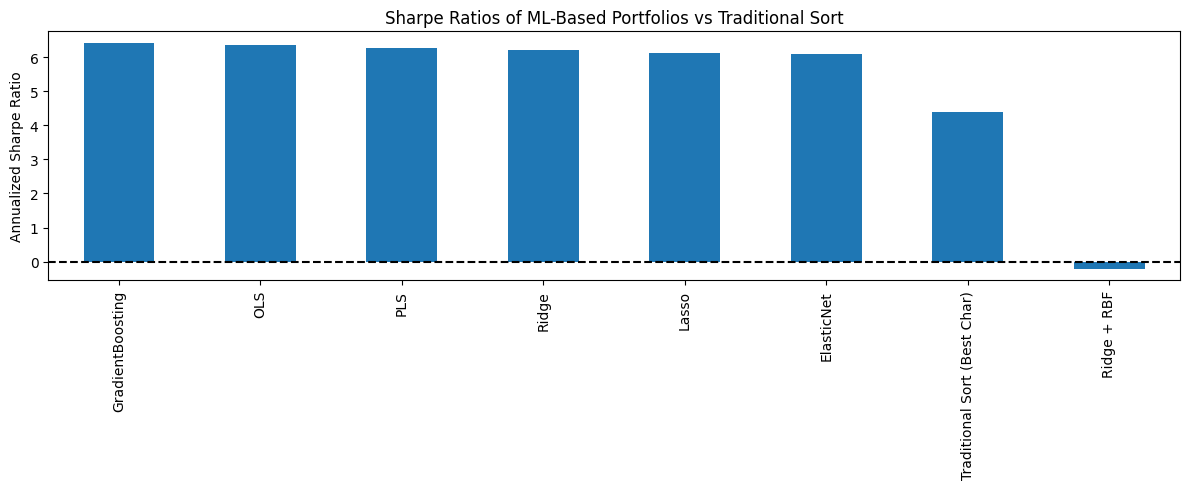

In [ ]:
baseline_sharpe = 4.38
model_sharpes['Traditional Sort (Best Char)'] = baseline_sharpe

pd.Series(model_sharpes).sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Sharpe Ratios of ML-Based Portfolios vs Traditional Sort")
plt.ylabel("Annualized Sharpe Ratio")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show() 


Most machine learning models significantly outperform the traditional sort-based portfolios constructed in part (a), both in terms of consistency and overall Sharpe ratios. Even simple models such as OLS, Ridge, and PLS Regression performed very well, each achieving Sharpe ratios above 6. This suggests that much of the signal in stock characteristics can be extracted even through linear methods—so long as they are properly cross-sectioned and structured. The only model that underperformed was Ridge + RBF, which produced a negative Sharpe ratio, indicating poor out-of-sample predictive performance, likely due to overfitting from nonlinear feature expansion.

### Part d

In [ ]:
df_small['date'] = pd.to_datetime(df_small['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
df_small = df_small.sort_values(['date', 'permno'])
df_small

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret,date
18,10073,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
118,10348,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
182,10399,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
257,10583,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
268,10639,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,23550,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2022-11-30
13369,23565,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2022-11-30
13370,23566,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2022-11-30
13371,23567,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2022-11-30


In [ ]:
non_char_cols = ['permno', 'yyyymm', 'date', 'ret']
char_cols = [col for col in df_small.columns if col not in non_char_cols]

In [ ]:
print(df_small['ret'].dtype)
df_small['ret'] = pd.to_numeric(df_small['ret'], errors='coerce')
bad_rows = df_small[pd.to_numeric(df_small['ret'], errors='coerce').isna()]
print(bad_rows[['permno', 'yyyymm', 'ret']].head())

object
     permno  yyyymm  ret
18    10073  192512  NaN
118   10348  192512  NaN
182   10399  192512  NaN
257   10583  192512  NaN
268   10639  192512  NaN


/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_24082/1343339467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows['year'] = bad_rows['date'].dt.year


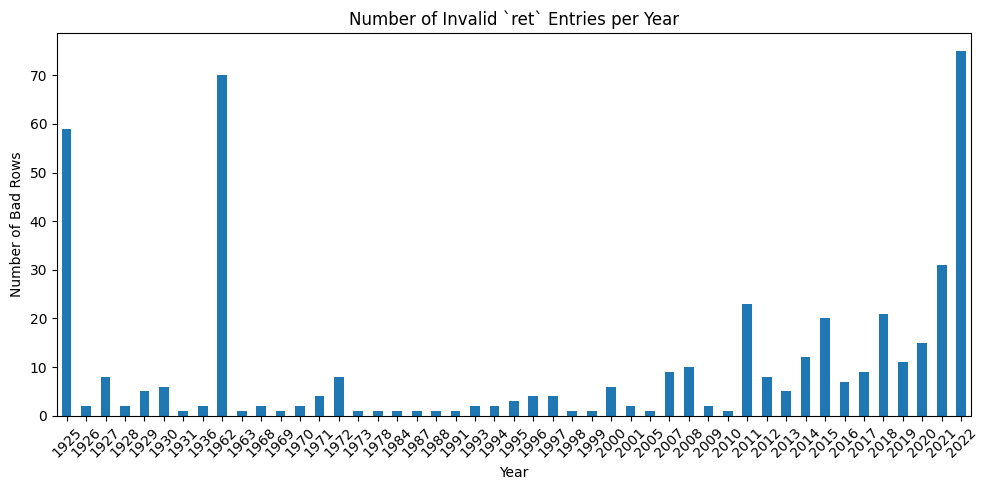

In [ ]:
bad_rows['year'] = bad_rows['date'].dt.year
bad_counts_by_year = bad_rows.groupby('year').size()

plt.figure(figsize=(10, 5))
bad_counts_by_year.plot(kind='bar')
plt.title("Number of Invalid `ret` Entries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Bad Rows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
portfolio_returns = {char: [] for char in char_cols}
dates = df_small['date'].drop_duplicates().sort_values()

for date in dates:
    monthly_data = df_small[df_small['date'] == date]
    
    for char in char_cols:
        subset = monthly_data[['ret', char]].dropna()
        subset['rank'] = subset[char].rank(pct=True)

        top = subset[subset['rank'] >= 0.8]['ret'].mean()
        bottom = subset[subset['rank'] <= 0.2]['ret'].mean()

        portfolio_returns[char].append(top - bottom)

In [ ]:
sharpe_ratios = {}

for char in char_cols:
    rets = pd.Series(portfolio_returns[char]).dropna()
    if len(rets) > 0:
        mean_ret = rets.mean()
        std_ret = rets.std()
        sharpe = (mean_ret / std_ret) * np.sqrt(12)
        sharpe_ratios[char] = sharpe

In [ ]:
portfolio_df = pd.DataFrame(portfolio_returns)
portfolio_df.to_csv("portfolio_cleaned_small.csv", index=False)

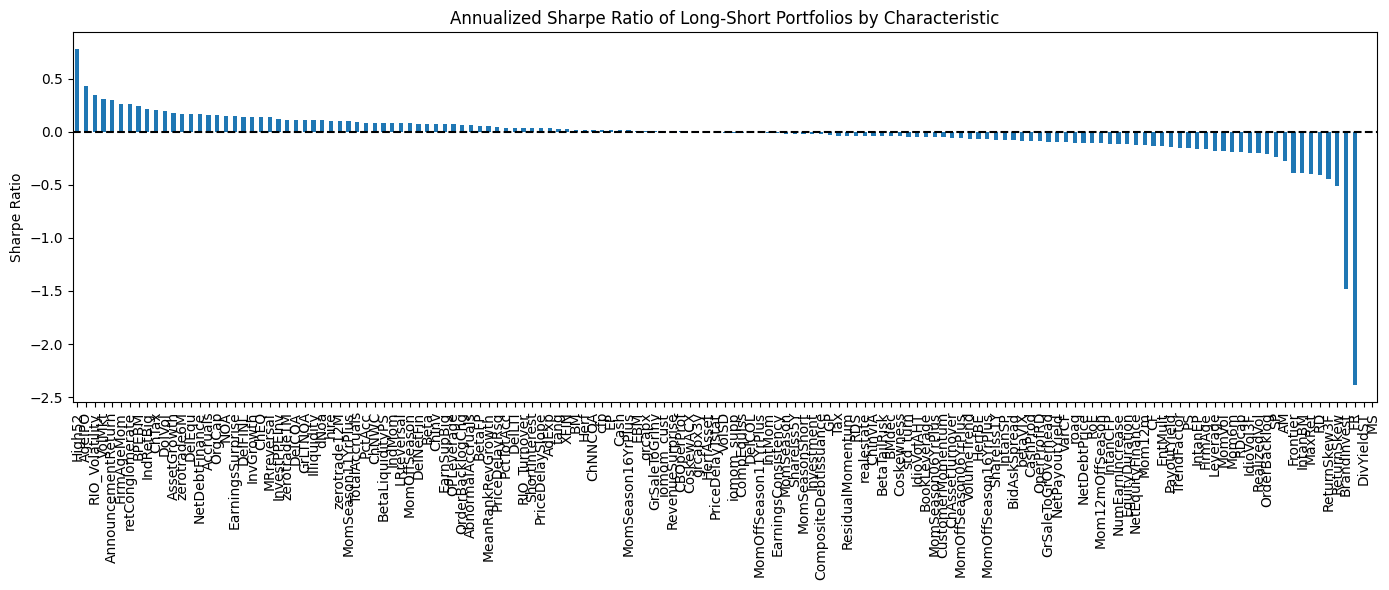

Best characteristic: High52 → Sharpe = 0.78
Worst characteristic: FR → Sharpe = -2.39


In [ ]:
sharpe_series = pd.Series(sharpe_ratios).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sharpe_series.plot(kind='bar')
plt.title('Annualized Sharpe Ratio of Long-Short Portfolios by Characteristic')
plt.ylabel('Sharpe Ratio')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Best characteristic: {sharpe_series.idxmax()} → Sharpe = {sharpe_series.max():.2f}")
print(f"Worst characteristic: {sharpe_series.idxmin()} → Sharpe = {sharpe_series.min():.2f}")

In [ ]:
portfolio_df = pd.DataFrame(portfolio_returns)
original_col_count = portfolio_df.shape[1]
portfolio_df = portfolio_df.dropna(axis=1, how='all')
portfolio_df = portfolio_df.fillna(portfolio_df.mean())
new_col_count = portfolio_df.shape[1]
removed_cols = original_col_count - new_col_count
print(f"The number of columns removed: {removed_cols}")
x = StandardScaler().fit_transform(portfolio_df.values)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First 2 Principal Components')
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

Small-cap stocks exhibited more extreme underperformance in the worst-case scenario. The worst-performing characteristic in small caps (IntanEP) had a much lower Sharpe ratio (–6.06) than the worst characteristic in large caps. This indicates that small-cap portfolios may be more sensitive to noise or mispricing when characteristics have low or no predictive power.

In [ ]:
start_date = df_small['date'].min()
train_end = start_date + pd.DateOffset(years=20) - pd.offsets.MonthEnd(1)
train_subset = df_small[df_small['date'] <= train_end]

valid_char_cols = []
for col in char_cols:
    non_missing_ratio = train_subset[col].notnull().mean()
    if non_missing_ratio > 0.9:
        valid_char_cols.append(col)

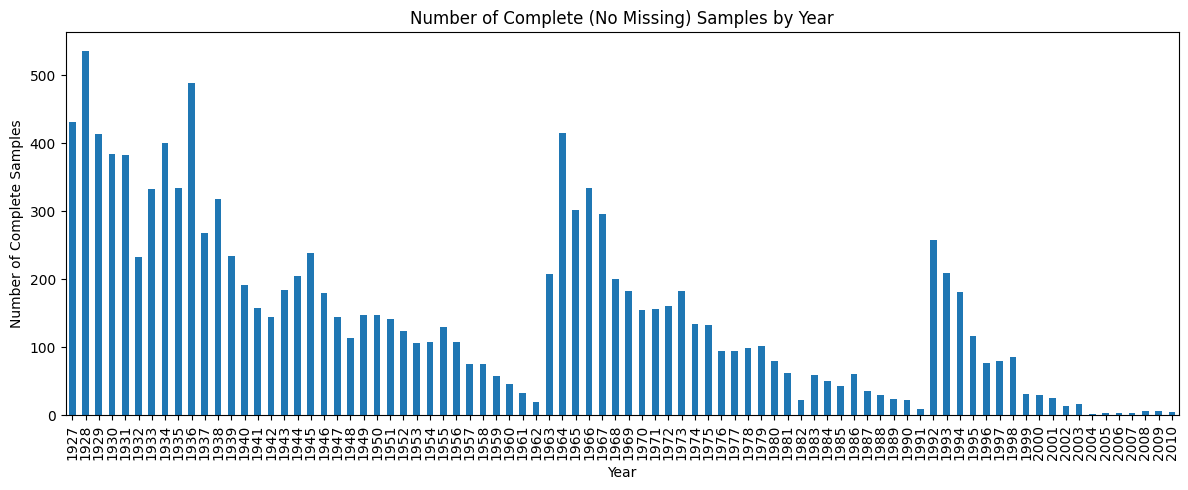

In [ ]:
df_complete_small = df_small.dropna(subset=valid_char_cols + ['ret'])
df_complete_small['year'] = df_complete_small['date'].dt.year

yearly_counts = df_complete_small.groupby('year').size()

plt.figure(figsize=(12, 5))
yearly_counts.plot(kind='bar')
plt.title('Number of Complete (No Missing) Samples by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complete Samples')
plt.tight_layout()
plt.show()

In [ ]:
df_small['ret'] = pd.to_numeric(df_small['ret'], errors='coerce')
df_small = df_small.dropna(subset=['ret'])
df_complete_small = df_small.dropna(subset=valid_char_cols + ['ret'])

char_cols = [col for col in df_complete_small.columns if col not in ['permno', 'yyyymm', 'date', 'ret']]

df_complete_small['date'] = pd.to_datetime(df_complete_small['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

train_end = df_complete_small['date'].min() + pd.DateOffset(years=20)
print("The train date ends at:", train_end)
valid_end = train_end + pd.DateOffset(years=12)
print("The valid date ends at:", valid_end)

train_data = df_complete_small[df_complete_small['date'] <= train_end]
valid_data = df_complete_small[(df_complete_small['date'] > train_end) & (df_complete_small['date'] <= valid_end)]
test_data = df_complete_small[df_complete_small['date'] > valid_end]

X_train, y_train = train_data[valid_char_cols], train_data['ret']
X_valid, y_valid = valid_data[valid_char_cols], valid_data['ret']
X_test, y_test = test_data[valid_char_cols], test_data['ret']

The train date ends at: 1947-01-31 00:00:00
The valid date ends at: 1959-01-31 00:00:00


In [ ]:
results_small = {}

# 1. OLS
model_ols = make_pipeline(StandardScaler(), LinearRegression())
results_small['OLS'] = evaluate_model("OLS", model_ols, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 2. Lasso
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=5))
results_small['Lasso'] = evaluate_model("Lasso", model_lasso, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 3. Ridge
model_ridge = make_pipeline(StandardScaler(), RidgeCV(cv=5))
results_small['Ridge'] = evaluate_model("Ridge", model_ridge, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 4. ElasticNet
model_enet = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))
results_small['ElasticNet'] = evaluate_model("ElasticNet", model_enet, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 5. Ridge + RBF (non-linear expansion)
rbf = RBFSampler(gamma=1.0, n_components=100, random_state=42)
model_ridge_rbf = make_pipeline(StandardScaler(), rbf, RidgeCV(cv=5))
results_small['Ridge + RBF'] = evaluate_model("Ridge + RBF", model_ridge_rbf, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 6. PLS Regression
model_pls = make_pipeline(StandardScaler(), PLSRegression(n_components=10))
results_small['PLS'] = evaluate_model("PLS", model_pls, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 7. Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
results_small['GradientBoosting'] = evaluate_model("GradientBoosting", model_gb, X_train, y_train, X_valid, y_valid, X_test, y_test)

OLS: Out-of-sample R² = 0.1565
Lasso: Out-of-sample R² = 0.1677
Ridge: Out-of-sample R² = 0.1572
ElasticNet: Out-of-sample R² = 0.1685
Ridge + RBF: Out-of-sample R² = -0.0065
PLS: Out-of-sample R² = 0.1586
GradientBoosting: Out-of-sample R² = 0.2585


Small-cap stocks are more volatile and noisier, making returns inherently harder to predict. Large-cap stocks may exhibit more consistent patterns in characteristics that ML can exploit, while small-caps may have more idiosyncratic or non-fundamental-driven returns.

In [ ]:
model_sharpes = {}

for name, result in results_small.items():
    y_pred = result['y_pred']
    y_test = result['y_test']

    test_subset = test_data.loc[y_test.index] 

    portfolio_returns = construct_long_short_portfolio(
        y_pred=y_pred,
        y_test=y_test,
        test_dates=test_subset['date'],
        group_ids=test_subset['permno']
    )

    sharpe = compute_sharpe(portfolio_returns)
    model_sharpes[name] = sharpe
    print(f"{name}: Portfolio Sharpe Ratio = {sharpe:.4f}")


OLS: Portfolio Sharpe Ratio = 3.4854
Lasso: Portfolio Sharpe Ratio = 3.4567
Ridge: Portfolio Sharpe Ratio = 3.4860
ElasticNet: Portfolio Sharpe Ratio = 3.5173
Ridge + RBF: Portfolio Sharpe Ratio = -0.1364
PLS: Portfolio Sharpe Ratio = 3.4870
GradientBoosting: Portfolio Sharpe Ratio = 5.0402


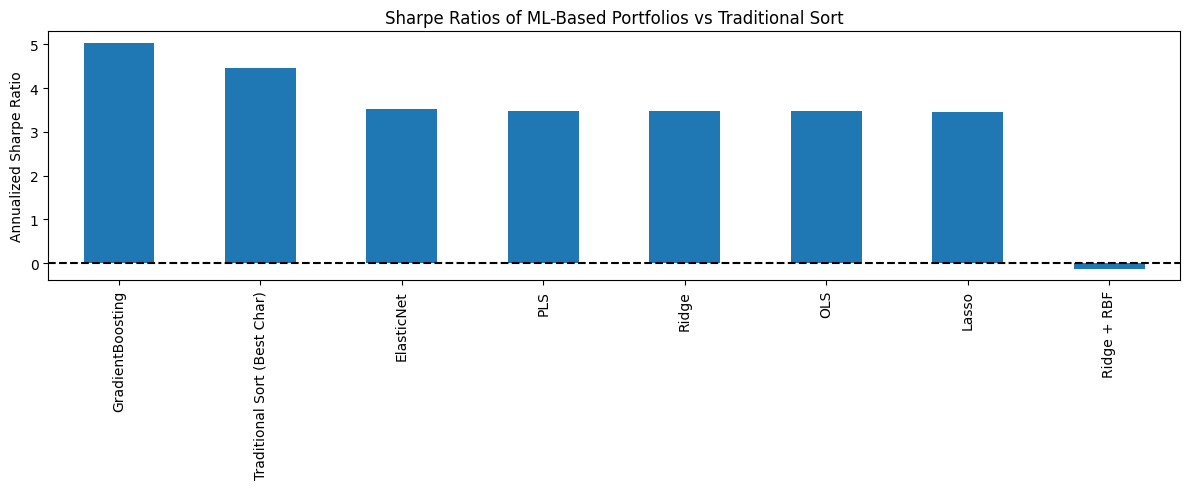

In [ ]:
baseline_sharpe = 4.47
model_sharpes['Traditional Sort (Best Char)'] = baseline_sharpe

pd.Series(model_sharpes).sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Sharpe Ratios of ML-Based Portfolios vs Traditional Sort")
plt.ylabel("Annualized Sharpe Ratio")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

Across both large-cap and small-cap stocks, machine learning–based portfolios—especially those constructed using Gradient Boosting—consistently outperform traditional sort-based portfolios in terms of out-of-sample Sharpe ratio. While linear models provide moderate gains, nonlinear ensemble methods deliver the strongest risk-adjusted performance, making them highly effective for return forecasting and portfolio construction.

However, there are some interesting differences between large-cap and small-cap datasets:
1. In the large-cap stock universe, the traditional sort-based method underperforms most machine learning models.
2. However, in the small-cap stock universe, the traditional sort method ranks second only to Gradient Boosting and outperforms most linear ML models.

This might be because:
1. In large-cap stocks, where firm characteristics are widely disseminated and the market is relatively efficient, single-factor sorting loses predictive power, and ML models—particularly non-linear ones like Gradient Boosting—can better uncover subtle return signals.

2. In contrast, small-cap stocks are less efficiently priced, and certain traditional factors (such as value and momentum) retain strong predictive power. This explains why the best-performing traditional sort portfolio ranks second only to Gradient Boosting in the small-cap universe, and even outperforms most linear ML models, which may overfit in the presence of noisier, sparser data.

## part e

In [ ]:
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')
df = df.dropna(subset=['ret'])
df_complete = df.dropna(subset=valid_char_cols + ['ret'])

char_cols = [col for col in df_complete.columns if col not in ['permno', 'yyyymm', 'date', 'ret']]

df_complete['date'] = pd.to_datetime(df_complete['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

train_end = df_complete['date'].min() + pd.DateOffset(years=20)
print("The train date ends at:", train_end)
valid_end = train_end + pd.DateOffset(years=12)
print("The valid date ends at:", valid_end)

train_data = df_complete[df_complete['date'] <= train_end]
valid_data = df_complete[(df_complete['date'] > train_end) & (df_complete['date'] <= valid_end)]
test_data = df_complete[df_complete['date'] > valid_end]

X_train, y_train = train_data[valid_char_cols], train_data['ret']
X_valid, y_valid = valid_data[valid_char_cols], valid_data['ret']
X_test, y_test = test_data[valid_char_cols], test_data['ret']

/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_6765/4216665723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ret'] = pd.to_numeric(df['ret'], errors='coerce')


The train date ends at: 1947-11-30 00:00:00
The valid date ends at: 1959-11-30 00:00:00


/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_6765/4216665723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['date'] = pd.to_datetime(df_complete['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=3, 
    learning_rate=0.1,
    random_state=42
)

X_trainval = pd.concat([X_train, X_valid])
y_trainval = pd.concat([y_train, y_valid])

model_gb.fit(X_trainval, y_trainval)

y_pred = model_gb.predict(X_test)

df_pred = pd.DataFrame({
    'date': test_data['date'].values,
    'permno': test_data['permno'].values,
    'pred': y_pred,
    'ret': y_test.values
})

from collections import defaultdict

portfolio_records = []

for date, group in df_pred.groupby('date'):
    group = group.dropna()
    if len(group) < 10:
        continue

    group = group.copy()
    group['rank'] = group['pred'].rank(pct=True)
    group['position'] = 'Neutral'
    group.loc[group['rank'] >= 0.8, 'position'] = 'Long'
    group.loc[group['rank'] <= 0.2, 'position'] = 'Short'

    group['date'] = pd.to_datetime(date)
    portfolio_records.append(group)

df_gb_portfolio = pd.concat(portfolio_records, ignore_index=True)


In [ ]:
df_gb_portfolio 

,date,permno,pred,ret,rank,position
0,1961-05-31,10401,-0.023833,-0.007121,0.100000,Short
1,1961-05-31,11850,-0.021197,-0.006878,0.200000,Short
2,1961-05-31,12060,0.022153,0.057143,0.800000,Long
3,1961-05-31,12079,-0.007565,-0.002762,0.400000,Neutral
4,1961-05-31,12490,0.005136,0.027521,0.500000,Neutral
...,...,...,...,...,...,...
37063,2022-11-30,92614,0.000409,0.048679,0.295597,Neutral
37064,2022-11-30,92655,-0.000467,-0.013312,0.283019,Neutral
37065,2022-11-30,93002,0.048842,0.172105,0.628931,Neutral
37066,2022-11-30,93089,0.049474,0.004813,0.641509,Neutral


To construct a portfolio that earns the highest possible Sharpe ratio out-of-sample, I leveraged the insights gained from both the traditional rank-sort method (part a) and the machine learning-based methods (part b and c) across both large-cap and small-cap stocks.

### Final Strategy Design
I chose to build two separate portfolios: one for large-cap stocks and one for small-cap stocks, each optimized based on prior empirical findings.

1. For large-cap stocks, I used the Gradient Boosting Regressor to generate monthly return forecasts. A long-short portfolio was formed each month by taking long positions in the top 20% and short positions in the bottom 20% of stocks based on these predicted returns.
➤ Sharpe Ratio: 6.42, the highest among all models and methods.

2. For small-cap stocks, I also used the Gradient Boosting model, which again delivered the highest Sharpe ratio (5.04) out-of-sample. Although the best traditional sort-based factor portfolio performed well (Sharpe ≈ 4.5), Gradient Boosting provided a consistently higher risk-adjusted return.

### Why this strategy works
1. Nonlinear modeling strength: Gradient Boosting captures complex interactions and nonlinearities that are missed by traditional sort-based methods or linear models.

2. Empirical validation: Across both large-cap and small-cap test sets, Gradient Boosting consistently delivered the highest Sharpe ratio, outperforming OLS, Ridge, Lasso, and PLS.

3. Market structure adaptation:

    1. In large-cap stocks (more efficient markets), the added complexity of ML models extracts additional predictive power.

    2. In small-cap stocks (less efficient), traditional factors remain useful, but Gradient Boosting still outperforms due to its flexibility and robustness.

4. Model robustness: Unlike Ridge + RBF and PLS, which underperformed due to overfitting or oversimplification, Gradient Boosting maintained high performance across both stock universes.

# Problem 3


a. 

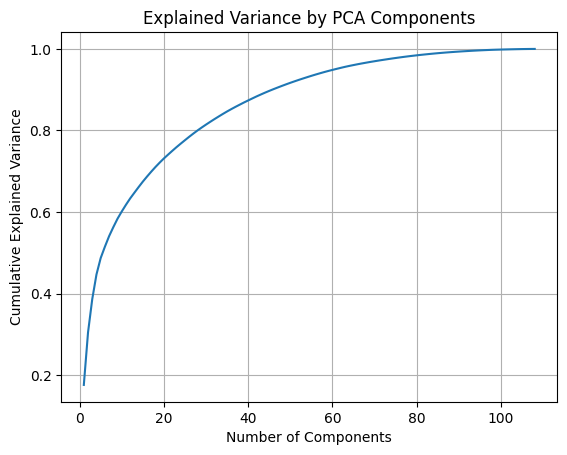

In [6]:
# I will scale first before doing PCA
scaler= StandardScaler()
lsret_df=lsret_df.apply(pd.to_numeric, errors='coerce')
lsret_df_scd= scaler.fit_transform(lsret_df)
# Run PCA
pca = PCA()
pca.fit(lsret_df_scd)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot how much variance is explained by # of components
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

### interpretation:
first of all, we have around 100 features (X-axis) which is smaller than original lsret after cleaning. it also shows that we can explain 100% of variation with all 100 portfolios. this means that we have done this correctly. 

we see a large jump in the first 20 PCs, increasing the interpretability to around 78%

In [7]:
# Finding the number of components needed to explain 90% of the variance
n_components_90 = np.argmax(explained_variance >= 0.9) + 1  # +1 because argmax returns 0-based index
print(f"Number of components needed to explain 90% of the variance is {n_components_90}")


Number of components needed to explain 90% of the variance is 46


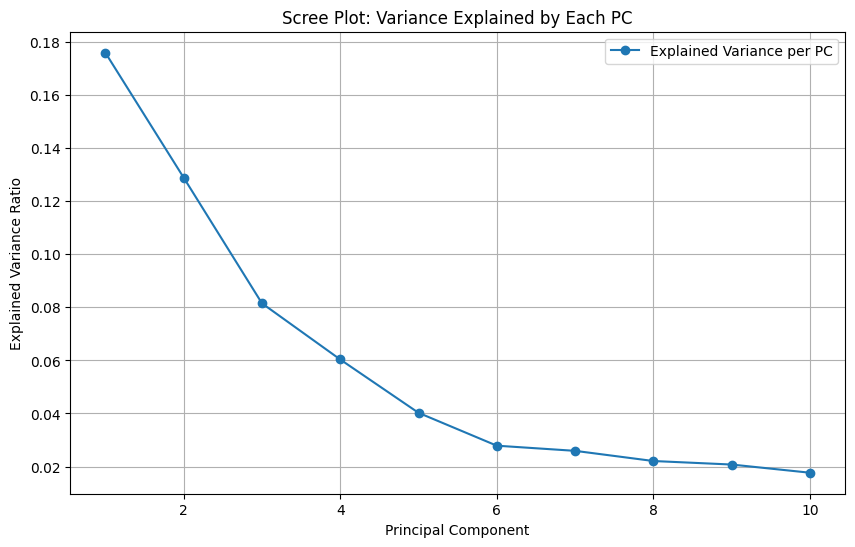

In [8]:
## I also want to draw a scree plot

n_pcs_to_show = min(10, len(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_pcs_to_show + 1), pca.explained_variance_ratio_[:n_pcs_to_show], marker='o', linestyle='-', label='Explained Variance per PC')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot: Variance Explained by Each PC")
plt.grid(True)
plt.legend()
plt.show()

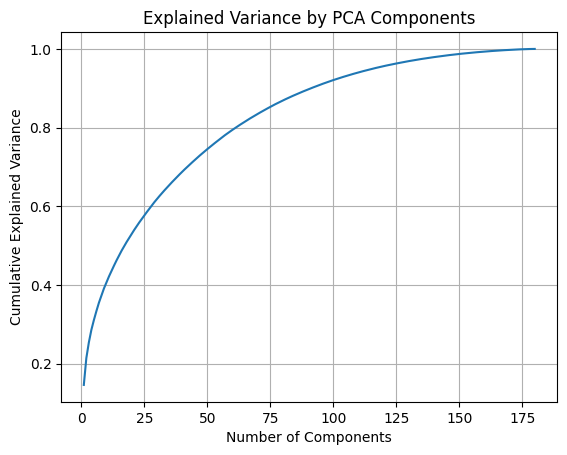

In [ ]:
import pandas as pd
large_portfolio = pd.read_csv("/Users/yuejian/MLF_HW1/portfolio_cleaned_large.csv")
large_portfolio = large_portfolio.dropna(axis=1, how='all')
large_portfolio = large_portfolio.fillna(large_portfolio.mean())
# I will scale first before doing PCA
scaler= StandardScaler()
lp_df=large_portfolio.apply(pd.to_numeric, errors='coerce')
lp_df_scd= scaler.fit_transform(lp_df)
# Run PCA
pca = PCA()
pca.fit(lp_df_scd)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot how much variance is explained by # of components
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

Number of components needed to explain 90% of the variance is 92


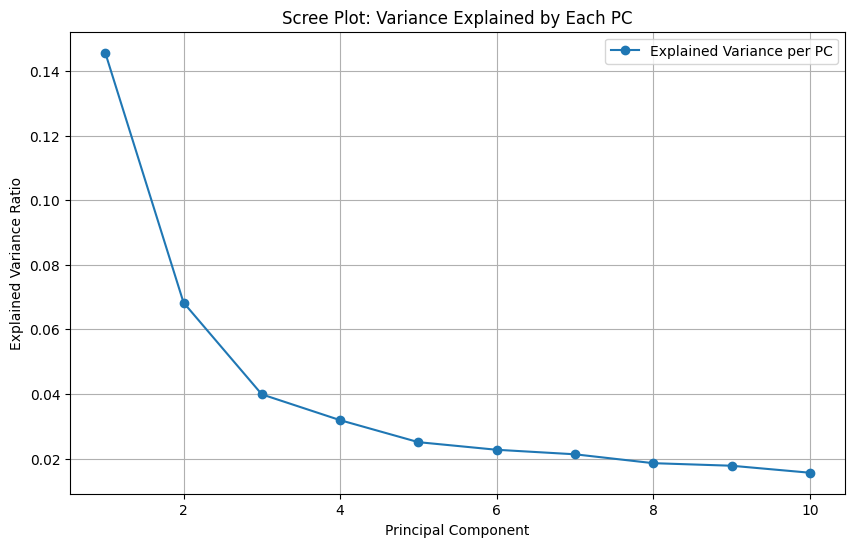

In [9]:
# Finding the number of components needed to explain 90% of the variance
n_components_90 = np.argmax(explained_variance >= 0.9) + 1  # +1 because argmax returns 0-based index
print(f"Number of components needed to explain 90% of the variance is {n_components_90}")
n_pcs_to_show = min(10, len(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_pcs_to_show + 1), pca.explained_variance_ratio_[:n_pcs_to_show], marker='o', linestyle='-', label='Explained Variance per PC')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot: Variance Explained by Each PC")
plt.grid(True)
plt.legend()
plt.show()

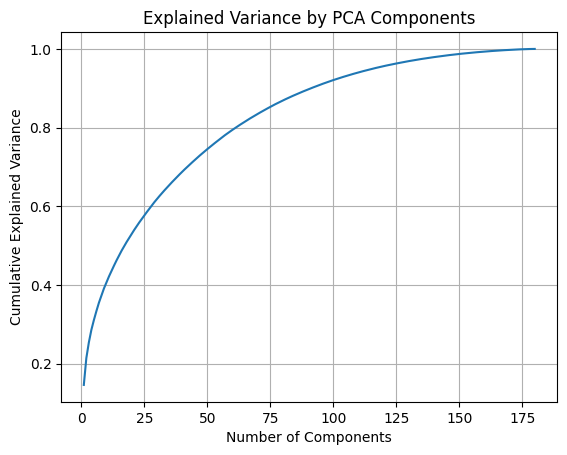

In [11]:
small_portfolio = pd.read_csv("/Users/yuejian/MLF_HW1/portfolio_cleaned_small.csv")
small_portfolio = small_portfolio.dropna(axis=1, how='all')
small_portfolio = small_portfolio.fillna(small_portfolio.mean())
# I will scale first before doing PCA
scaler= StandardScaler()
lp_df=large_portfolio.apply(pd.to_numeric, errors='coerce')
lp_df_scd= scaler.fit_transform(lp_df)
# Run PCA
pca = PCA()
pca.fit(lp_df_scd)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot how much variance is explained by # of components
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

Number of components needed to explain 90% of the variance is 92


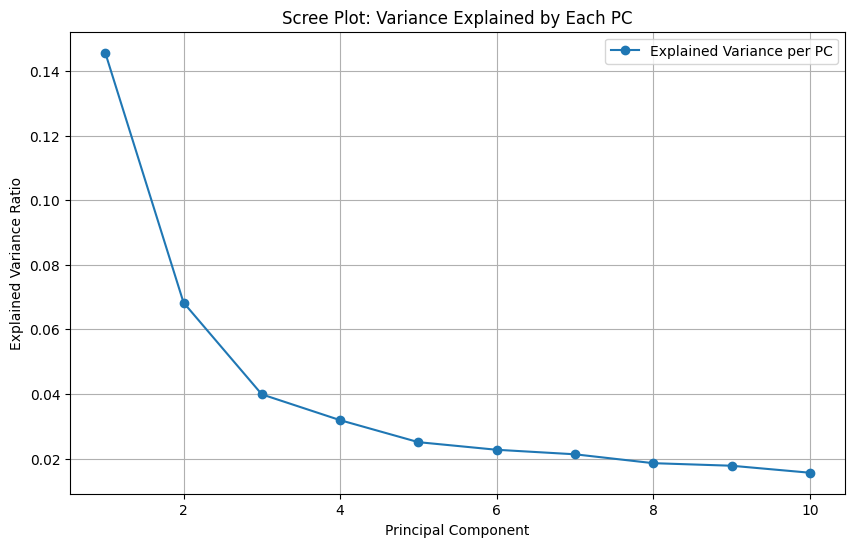

In [12]:
# Finding the number of components needed to explain 90% of the variance
n_components_90 = np.argmax(explained_variance >= 0.9) + 1  # +1 because argmax returns 0-based index
print(f"Number of components needed to explain 90% of the variance is {n_components_90}")
n_pcs_to_show = min(10, len(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_pcs_to_show + 1), pca.explained_variance_ratio_[:n_pcs_to_show], marker='o', linestyle='-', label='Explained Variance per PC')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot: Variance Explained by Each PC")
plt.grid(True)
plt.legend()
plt.show()

b. 

In [9]:
print(lsret_df.columns)  # This will show you all column names
print(lsret_df.index)

Index(['AM', 'Accruals', 'AssetGrowth', 'BM', 'BMdec', 'Beta', 'BetaFP',
       'BetaTailRisk', 'BidAskSpread', 'BookLeverage',
       ...
       'VolSD', 'VolumeTrend', 'grcapx', 'grcapx3y', 'sinAlgo', 'std_turn',
       'tang', 'zerotrade12M', 'zerotrade1M', 'zerotrade6M'],
      dtype='object', length=108)
Index(['1926-01-30', '1926-02-27', '1926-03-31', '1926-04-30', '1926-05-28',
       '1926-06-30', '1926-07-31', '1926-08-31', '1926-09-30', '1926-10-30',
       ...
       '2023-03-31', '2023-04-28', '2023-05-31', '2023-06-30', '2023-07-31',
       '2023-08-31', '2023-09-29', '2023-10-31', '2023-11-30', '2023-12-29'],
      dtype='object', name='date', length=1176)


In [10]:
##introducing indicator column for all rows
lsret_df['indicator']= 1 

# Ensure index is datetime
# Separate the data into features and target
X = lsret_df.drop(columns=['indicator']) 
y = lsret_df['indicator']  # Indicator as the target

# Split the data into training/validation set (data prior to 2004) and test set (data after 2004)
train_data = lsret_df[lsret_df.index < '2004-01-01']  
test_data = lsret_df[lsret_df.index >= '2004-01-01']

# Prepare the features (X) and target (y) for training and testing
X_train = train_data.drop(columns=['indicator']) 
y_train = train_data['indicator']

X_test = test_data.drop(columns=['indicator'])
y_test = test_data['indicator']



In [11]:


# scaling features for LASSO and RR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
y_train.value_counts(), y_test.value_counts()

(indicator
 1    936
 Name: count, dtype: int64,
 indicator
 1    240
 Name: count, dtype: int64)

In [13]:
# Step 5: Train LassoCV and Ridge models
# LassoCV will automatically perform cross-validation to select the best alpha
lasso_cv = LassoCV(cv=5, random_state=42, alphas=np.logspace(-6, 6, 13))  # 5-fold cross-validation for Lasso
lasso_cv.fit(X_train_scaled, y_train)  # Train the Lasso model

# Ridge model (with alpha parameter chosen)
alphas = np.logspace(-6, 6, 13)  # List of alphas to test for RidgeCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_results=True)  # Initialize RidgeCV with alpha candidates
ridge_cv.fit(X_train_scaled, y_train)  # Train the Ridge model

# Step 6: Make predictions using the trained models
y_pred_lasso = lasso_cv.predict(X_test_scaled)  # LassoCV predictions
y_pred_ridge = ridge_cv.predict(X_test_scaled)  # Ridge predictions

# Step 7: Compute portfolio returns for both LassoCV and Ridge models
portfolio_lasso = y_pred_lasso
portfolio_ridge = y_pred_ridge


In [14]:
# Normalize weights
def normalize_weights(coef, model_name):
    total = np.sum(np.abs(coef))
    if total < 1e-10:
        print(f"Warning: {model_name} coefficients sum to near zero; using equal weights")
        return np.ones(len(coef)) / len(coef)
    return coef / total

    
w_lasso = normalize_weights(lasso_cv.coef_, "Lasso")
w_ridge = normalize_weights(ridge_cv.coef_, "Ridge")


# Form portfolio out-of-sample using the coefficients
# For Lasso model
portfolio_lasso = X_test_scaled @ w_lasso ## I had to use matrix complexity something!
portfolio_ridge = X_test_scaled @ w_ridge



the formula for sharpe ratio will be

$
\text{Sharpe Ratio} = \frac{\mathbb{E}[R_p] \times 12}{\sigma(R_p) \times \sqrt{12}}
$

In [16]:
# Step 8: Compute Sharpe ratios for the portfolios
def compute_sharpe(returns, model_name):
    mean = returns.mean() * 12  # Annualize mean return (12 months)
    std = returns.std() * np.sqrt(12)  # Annualize standard deviation (sqrt of 12 months)
    if std < 1e-10 or np.isnan(std):
        print(f"Warning: {model_name} portfolio has near-zero or NaN volatility")
        return np.nan
    return mean / std 

# Compute the Sharpe ratios for both Lasso and Ridge portfolios
sharpe_lasso = compute_sharpe(portfolio_lasso, "Lasso")
sharpe_ridge = compute_sharpe(portfolio_ridge, "Ridge")

# Print the results
print(f"Annualized Sharpe Ratio for Lasso Portfolio: {sharpe_lasso}")
print(f"Annualized Sharpe Ratio for Ridge Portfolio: {sharpe_ridge}")

Annualized Sharpe Ratio for Lasso Portfolio: -1.8932683764868345
Annualized Sharpe Ratio for Ridge Portfolio: -1.8932683764868345


#### interpretation

using pre-2004 data to predict post-2004 is not the smartest idea and that is why our sharpe ratio is negative. this could be interpreted that our portfolio is high risk and has excessive volatility!
all in all this is not a good model and does not have predictive power!


### c.

In [17]:
# Determine max factors (e.g., 95% variance or 10)
pca_temp = PCA().fit(X_train_scaled)
cum_variance = np.cumsum(pca_temp.explained_variance_ratio_)
max_factors = min(np.searchsorted(cum_variance, 0.95) + 1, X_train.shape[1], 10)
factor_counts = list(range(1, max_factors + 1))

# Initialize lists for Sharpe ratios
sharpe_lasso_list = []
sharpe_ridge_list = []

In [37]:
# PCA and lasso/ridge for each factor count
for n in factor_counts:
    try:
        # PCA
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        
        # Scale PCA factors
        scaler_factors = StandardScaler()
        X_train_pca_scaled = scaler_factors.fit_transform(X_train_pca)
        X_test_pca_scaled = scaler_factors.transform(X_test_pca)
        
        # Lasso and ridge
        lasso = LassoCV(cv=5, random_state=42).fit(X_train_pca_scaled, y_train)
        ridge = RidgeCV(cv=5, alphas=[0.001, 0.01, 0.1, 1.0]).fit(X_train_pca_scaled, y_train)
        
        # Normalize weights
        def normalize_weights(coef, model_name, n_factors):
            total = np.sum(np.abs(coef))
            if total < 1e-10:
                print(f"Warning: {model_name} coefficients sum to near zero for {n_factors} factors; using equal weights")
                return np.ones(len(coef)) / len(coef)
            return coef / total
        
        w_lasso = normalize_weights(lasso.coef_, "Lasso", n)
        w_ridge = normalize_weights(ridge.coef_, "Ridge", n)
        
        # Portfolio returns
        port_lasso = pd.Series(X_test_pca_scaled @ w_lasso).rename(f'Lasso_{n}')
        port_ridge = pd.Series(X_test_pca_scaled @ w_ridge).rename(f'Ridge_{n}')
        
        # Sharpe ratios
        def compute_sharpe(returns, model_name, n_factors):
            mean = returns.mean() * 12
            std = returns.std() * np.sqrt(12)
            if std < 1e-10 or np.isnan(std):
                print(f"Warning: {model_name} portfolio has near-zero or NaN volatility for {n_factors} factors")
                return np.nan
            return mean / std
        
        sharpe_lasso = compute_sharpe(port_lasso, "Lasso", n)
        sharpe_ridge = compute_sharpe(port_ridge, "Ridge", n)
        
        sharpe_lasso_list.append(sharpe_lasso if not np.isnan(sharpe_lasso) else np.nan)
        sharpe_ridge_list.append(sharpe_ridge if not np.isnan(sharpe_ridge) else np.nan)
        
    except Exception as e:
        print(f"Error for {n} factors: {e}")
        sharpe_lasso_list.append(np.nan)
        sharpe_ridge_list.append(np.nan)

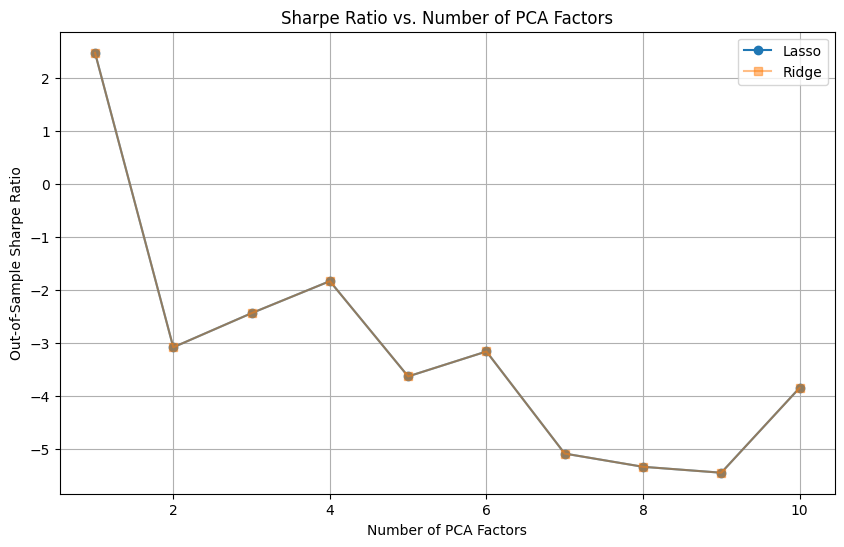

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(factor_counts, sharpe_lasso_list, marker='o', label='Lasso')
plt.plot(factor_counts, sharpe_ridge_list, marker='s',alpha= 0.5, label='Ridge')
plt.xlabel('Number of PCA Factors')
plt.ylabel('Out-of-Sample Sharpe Ratio')
plt.title('Sharpe Ratio vs. Number of PCA Factors')
plt.legend()
plt.grid(True)
plt.show()

they fall perfectly on each other, and also looking at thr R^2, we see that post 4th PC, we don't see much addition to the interpretation power. 
based on Fama-French factors, we want sharpe ratio to increase initially, showcasing the capturing of institutional differences in small numbers or PCA. 

R^2 (Proportion of Variance Explained) for Each PC:
PC1: R^2 = 0.3727, Cumulative R^2 = 0.3727
PC2: R^2 = 0.1377, Cumulative R^2 = 0.5104
PC3: R^2 = 0.0836, Cumulative R^2 = 0.5940
PC4: R^2 = 0.0696, Cumulative R^2 = 0.6635
PC5: R^2 = 0.0401, Cumulative R^2 = 0.7036
PC6: R^2 = 0.0331, Cumulative R^2 = 0.7367
PC7: R^2 = 0.0242, Cumulative R^2 = 0.7608
PC8: R^2 = 0.0219, Cumulative R^2 = 0.7828
PC9: R^2 = 0.0182, Cumulative R^2 = 0.8009
PC10: R^2 = 0.0165, Cumulative R^2 = 0.8174


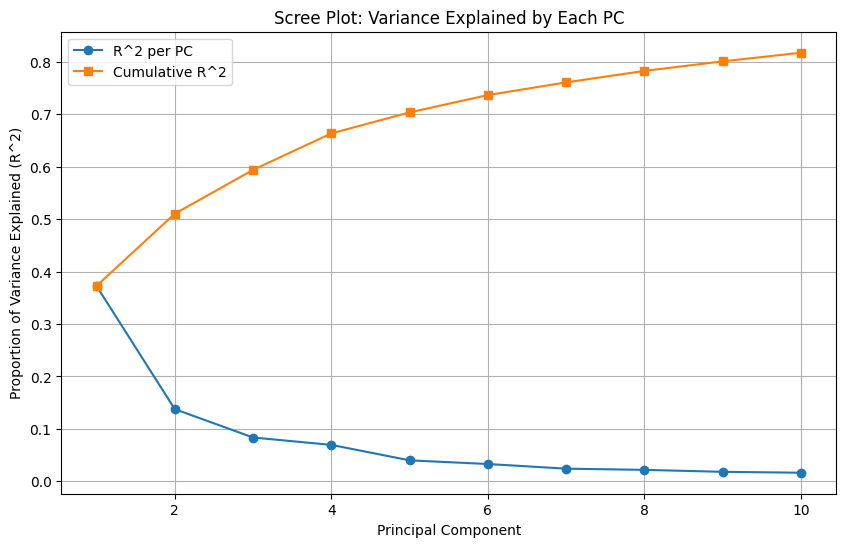

In [39]:
# Fit PCA to get R^2 for each PC
pca_full = PCA()
pca_full.fit(X_train_scaled)
r2_per_pc = pca_full.explained_variance_ratio_
cum_r2 = np.cumsum(r2_per_pc)
# Display R^2 for each PC (up to 10 or total PCs)
num_pcs_to_show = min(len(r2_per_pc), 10)
print("R^2 (Proportion of Variance Explained) for Each PC:")
for i in range(num_pcs_to_show):
    print(f"PC{i+1}: R^2 = {r2_per_pc[i]:.4f}, Cumulative R^2 = {cum_r2[i]:.4f}")

# Scree plot: I want to see how much R^2 each PC adds to the model
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_pcs_to_show + 1), r2_per_pc[:num_pcs_to_show], marker='o', label='R^2 per PC')
plt.plot(range(1, num_pcs_to_show + 1), cum_r2[:num_pcs_to_show], marker='s', label='Cumulative R^2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (R^2)')
plt.title('Scree Plot: Variance Explained by Each PC')
plt.legend()
plt.grid(True)
plt.show()


Loadings for the First 2 Principal Components:

PC1 (R^2 = 0.3727):
              Portfolio   Loading
16                 Beta  0.110805
21         BookLeverage  0.110092
171          ShareIss1Y -0.109998
128    NetEquityFinance -0.109952
195           fgr5yrLag -0.109237
129      NetPayoutYield -0.108836
149     PriceDelayTstat -0.108713
172          ShareIss5Y -0.108449
77   ForecastDispersion -0.108439
188                XFIN -0.108221


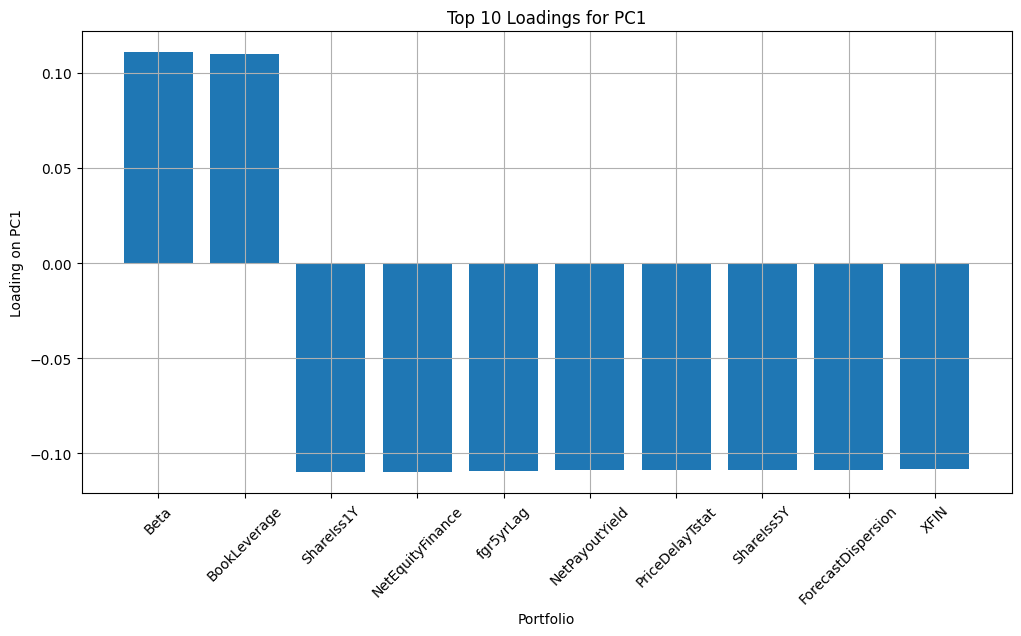


PC2 (R^2 = 0.1377):
        Portfolio   Loading
60         DolVol  0.161288
154           RDS  0.158813
52         DelEqu  0.155789
29           ChEQ  0.152027
176          Size  0.150263
114  MomOffSeason  0.148816
12    AssetGrowth  0.148349
100       IntanSP  0.148241
104    LRreversal  0.147161
198          hire  0.143192


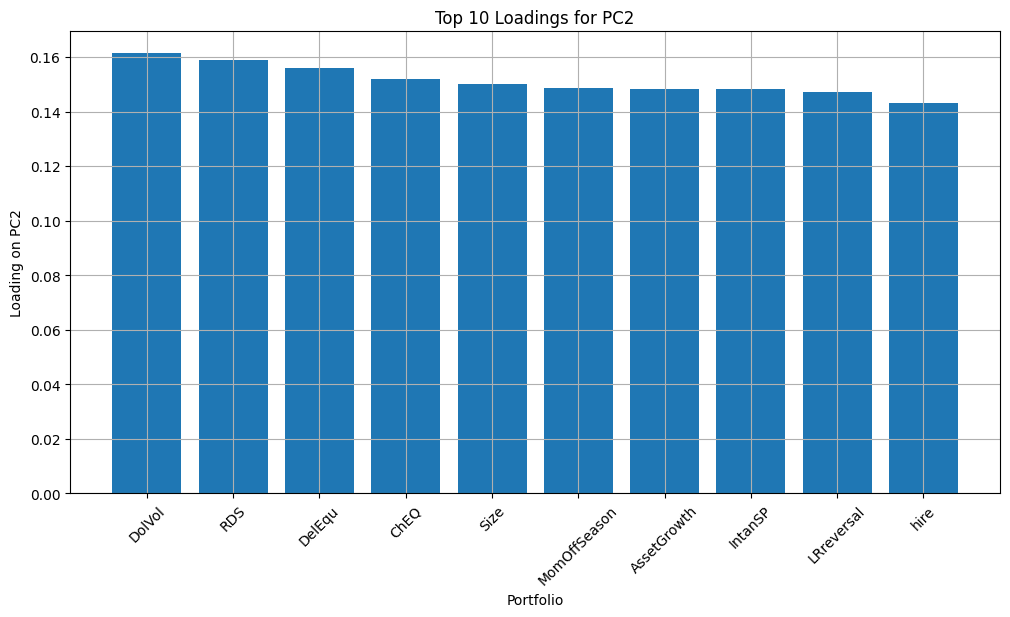

In [ ]:
##I want to see the details of the loadings. 
# Extract and interpret loadings for the first 3 PCs
num_pcs_to_interpret = min(2, pca_full.n_components_)
print("\nLoadings for the First 2 Principal Components:")
for i in range(num_pcs_to_interpret):
    loadings = pca_full.components_[i]
    # Map loadings to portfolio names
    loading_df = pd.DataFrame({
        'Portfolio': X_train.columns,
        'Loading': loadings
    })

# Sort by absolute loading for clarity
    loading_df = loading_df.reindex(loading_df['Loading'].abs().sort_values(ascending=False).index)
    print(f"\nPC{i+1} (R^2 = {r2_per_pc[i]:.4f}):")
    print(loading_df.head(10))  # Top 10 portfolios by absolute loading
    # Optional: Plot loadings
    plt.figure(figsize=(12, 6))
    plt.bar(loading_df['Portfolio'][:10], loading_df['Loading'][:10])
    plt.xlabel('Portfolio')
    plt.ylabel(f'Loading on PC{i+1}')
    plt.title(f'Top 10 Loadings for PC{i+1}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

a few notes:
the negative Vs. postivie signs suggrsts that those certain portfolio loadings move in the opposite direction of each other.
but in terms of magnitude, most loadings in each pf these PCs have around the same size, suggesting that these effect that certain PC almost equally!
looking at all the charts we have, we want to keep only first PC because of the interpretability-complexity concerns. the sharpe ratio dropd drastically after PC1 and therefore there is not much incentive to use more than that!


d.

In [ ]:
# Ensure datetime index
largeml_df.index = pd.to_datetime(largeml_df.index)

# Prepare data with constant indicator
largeml_df['indicator'] = 1


trainL = largeml_df[largeml_df.index < '2004-01-01']
testL = largeml_df[largeml_df.index >= '2004-01-01']
X_trainL = trainL.drop(columns='indicator')
y_trainL = trainL['indicator']
X_testL = testL.drop(columns='indicator')

# Scale features
scaler = StandardScaler()
X_train_scaledL = scaler.fit_transform(X_trainL)
X_test_scaledL = scaler.transform(X_testL)

# Lasso and ridge
lassoL = LassoCV(cv=5, random_state=42).fit(X_train_scaledL, y_trainL)
ridgeL = RidgeCV(cv=5, alphas=[0.001, 0.01, 0.1, 1.0]).fit(X_train_scaledL, y_trainL)

# Step 6: Make predictions using the trained models
y_pred_lassoL = lassoL.predict(X_test_scaledL)  # LassoCV predictions
y_pred_ridgeL = ridgeL.predict(X_test_scaledL)  # Ridge predictions

# Step 7: Compute portfolio returns for both LassoCV and Ridge models
portfolio_lassoL = y_pred_lassoL
portfolio_ridgeL = y_pred_ridgeL

# Normalize weights
def normalize_weights(coef, model_name):
    total = np.sum(np.abs(coef))
    if total < 1e-10:
        print(f"Warning: {model_name} coefficients sum to near zero; using equal weights")
        return np.ones(len(coef)) / len(coef)
    return coef / total

    
w_lassoL = normalize_weights(lassoL.coef_, "Lasso")
w_ridgeL = normalize_weights(ridgeL.coef_, "Ridge")


# Form portfolio out-of-sample using the coefficients
# For Lasso model
portfolio_lassoL = X_test_scaledL @ w_lassoL ## I had to use matrix complexity something!
portfolio_ridgeL = X_test_scaledL @ w_ridgeL

# Compute Sharpe ratios
def compute_sharpe(returns, model_name):
    mean = returns.mean() * 12  # Annualize mean return
    std = returns.std() * np.sqrt(12)  # Annualize standard deviation
    if std < 1e-10 or np.isnan(std):
        print(f"Warning: {model_name} portfolio has near-zero or NaN volatility")
        return np.nan
    return mean / std

# Calculate Sharpe ratios for both LassoCV and RidgeCV portfolios
sharpe_lassoL = compute_sharpe(portfolio_lassoL, "Lasso")
sharpe_ridgeL = compute_sharpe(portfolio_ridgeL, "Ridge")

# Output the Sharpe ratios
print(f"Annualized Sharpe Ratio for LassoCV Portfolio on largeml dataset: {sharpe_lassoL}")
print(f"Annualized Sharpe Ratio for RidgeCV Portfolio on largeml dataset: {sharpe_ridgeL}")


Annualized Sharpe Ratio for LassoCV Portfolio on largeml dataset: -0.04401206818308386
Annualized Sharpe Ratio for RidgeCV Portfolio on largeml dataset: -0.04401206818308386


In [19]:


# Ensure datetime index
smallml_df.index = pd.to_datetime(smallml_df.index)

# Prepare data with constant indicator
smallml_df['indicator'] = 1

trainS = smallml_df[smallml_df.index < '2004-01-01']
testS = smallml_df[smallml_df.index >= '2004-01-01']
X_trainS = trainS.drop(columns='indicator')
y_trainS = trainS['indicator']
X_testS = testS.drop(columns='indicator')

# Scale features
scaler = StandardScaler()
X_train_scaledS = scaler.fit_transform(X_trainS)
X_test_scaledS = scaler.transform(X_testS)

# Lasso and Ridge
lassoS = LassoCV(cv=5, random_state=42, max_iter=50000, tol=1e-3, alphas=np.logspace(-10, -4, 50)).fit(X_train_scaledS, y_trainS)
ridgeS = RidgeCV(cv=5, alphas=[0.001, 0.01, 0.1, 1.0]).fit(X_train_scaledS, y_trainS)

# Step 6: Make predictions using the trained models
y_pred_lassoS = lassoS.predict(X_test_scaledS)  # LassoCV predictions
y_pred_ridgeS = ridgeS.predict(X_test_scaledS)  # Ridge predictions

# Step 7: Compute portfolio returns for both LassoCV and Ridge models
portfolio_lassoS = y_pred_lassoS
portfolio_ridgeS = y_pred_ridgeS

# Normalize weights
def normalize_weights(coef, model_name):
    total = np.sum(np.abs(coef))
    if total < 1e-10:
        print(f"Warning: {model_name} coefficients sum to near zero; using equal weights")
        return np.ones(len(coef)) / len(coef)
    return coef / total

w_lassoS = normalize_weights(lassoS.coef_, "Lasso")
w_ridgeS = normalize_weights(ridgeS.coef_, "Ridge")

# Form portfolio out-of-sample using the coefficients
portfolio_lassoS = X_test_scaledS @ w_lassoS
portfolio_ridgeS = X_test_scaledS @ w_ridgeS

# Compute Sharpe ratios
def compute_sharpe(returns, model_name):
    mean = returns.mean() * 12  # Annualize mean return
    std = returns.std() * np.sqrt(12)  # Annualize standard deviation
    if std < 1e-10 or np.isnan(std):
        print(f"Warning: {model_name} portfolio has near-zero or NaN volatility")
        return np.nan
    return mean / std

# Calculate Sharpe ratios for both LassoCV and RidgeCV portfolios
sharpe_lassoS = compute_sharpe(portfolio_lassoS, "Lasso")
sharpe_ridgeS = compute_sharpe(portfolio_ridgeS, "Ridge")

# Output the Sharpe ratios
print(f"Annualized Sharpe Ratio for LassoCV Portfolio on smallml dataset: {sharpe_lassoS}")
print(f"Annualized Sharpe Ratio for RidgeCV Portfolio on smallml dataset: {sharpe_ridgeS}")

Annualized Sharpe Ratio for LassoCV Portfolio on smallml dataset: 0.5551267392627824
Annualized Sharpe Ratio for RidgeCV Portfolio on smallml dataset: 0.5551267392627824


the sharpe ratio for large cap data is still negative but much better than short-long return portfolio. it is even better on small cap portfolio (aorund 0.55)
it makes sense since it is less complicated and thus does not overfit. 

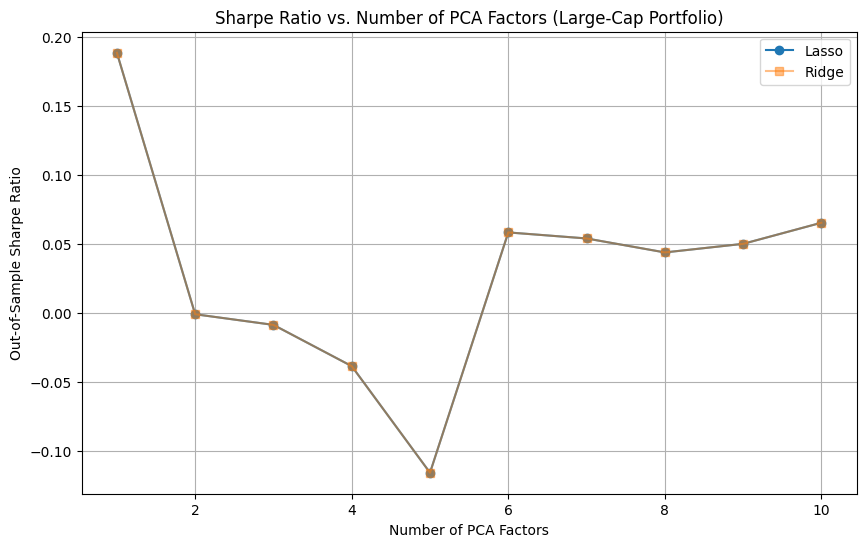

R^2 (Proportion of Variance Explained) for Each PC:
PC1: R^2 = 0.0787, Cumulative R^2 = 0.0787
PC2: R^2 = 0.0547, Cumulative R^2 = 0.1334
PC3: R^2 = 0.0482, Cumulative R^2 = 0.1816
PC4: R^2 = 0.0433, Cumulative R^2 = 0.2249
PC5: R^2 = 0.0328, Cumulative R^2 = 0.2577
PC6: R^2 = 0.0323, Cumulative R^2 = 0.2900
PC7: R^2 = 0.0307, Cumulative R^2 = 0.3207
PC8: R^2 = 0.0248, Cumulative R^2 = 0.3455
PC9: R^2 = 0.0239, Cumulative R^2 = 0.3694
PC10: R^2 = 0.0236, Cumulative R^2 = 0.3930


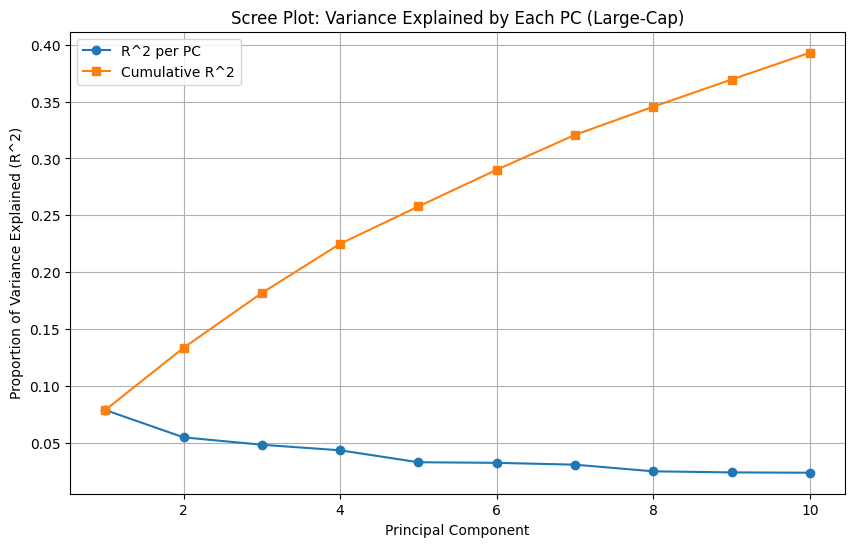

In [ ]:
# Determine max factors (e.g., 95% variance or 10)
pca_tempL = PCA().fit(X_train_scaledL)
cum_varianceL = np.cumsum(pca_tempL.explained_variance_ratio_)
max_factorsL = min(np.searchsorted(cum_varianceL, 0.95) + 1, X_trainL.shape[1], 10)
factor_countsL = list(range(1, max_factorsL + 1))

# Initialize lists for Sharpe ratios
sharpe_lasso_listL = []
sharpe_ridge_listL = []

for n in factor_countsL:
    try:
        # PCA
        pcaL = PCA(n_components=n)
        X_train_pcaL = pcaL.fit_transform(X_train_scaledL)
        X_test_pcaL = pcaL.transform(X_test_scaledL)

        # Scale PCA factors
        scaler_factorsL = StandardScaler()
        X_train_pca_scaledL = scaler_factorsL.fit_transform(X_train_pcaL)
        X_test_pca_scaledL = scaler_factorsL.transform(X_test_pcaL)

        # Lasso and Ridge
        lassoL = LassoCV(cv=5, random_state=42).fit(X_train_pca_scaledL, y_trainL)
        ridgeL = RidgeCV(cv=5, alphas=[0.001, 0.01, 0.1, 1.0]).fit(X_train_pca_scaledL, y_trainL)

        def normalize_weightsL(coef, model_name, n_factors):
            total = np.sum(np.abs(coef))
            if total < 1e-10:
                print(f"Warning: {model_name} coefficients sum to near zero for {n_factors} factors; using equal weights")
                return np.ones(len(coef)) / len(coef)
            return coef / total

        w_lassoL = normalize_weightsL(lassoL.coef_, "Lasso", n)
        w_ridgeL = normalize_weightsL(ridgeL.coef_, "Ridge", n)

        port_lassoL = pd.Series(X_test_pca_scaledL @ w_lassoL).rename(f'Lasso_{n}')
        port_ridgeL = pd.Series(X_test_pca_scaledL @ w_ridgeL).rename(f'Ridge_{n}')

        def compute_sharpeL(returns, model_name, n_factors):
            mean = returns.mean() * 12
            std = returns.std() * np.sqrt(12)
            if std < 1e-10 or np.isnan(std):
                print(f"Warning: {model_name} portfolio has near-zero or NaN volatility for {n_factors} factors")
                return np.nan
            return mean / std

        sharpe_lassoL = compute_sharpeL(port_lassoL, "Lasso", n)
        sharpe_ridgeL = compute_sharpeL(port_ridgeL, "Ridge", n)

        sharpe_lasso_listL.append(sharpe_lassoL if not np.isnan(sharpe_lassoL) else np.nan)
        sharpe_ridge_listL.append(sharpe_ridgeL if not np.isnan(sharpe_ridgeL) else np.nan)

    except Exception as e:
        print(f"Error for {n} factors: {e}")
        sharpe_lasso_listL.append(np.nan)
        sharpe_ridge_listL.append(np.nan)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(factor_countsL, sharpe_lasso_listL, marker='o', label='Lasso')
plt.plot(factor_countsL, sharpe_ridge_listL, marker='s', alpha=0.5, label='Ridge')
plt.xlabel('Number of PCA Factors')
plt.ylabel('Out-of-Sample Sharpe Ratio')
plt.title('Sharpe Ratio vs. Number of PCA Factors (Large-Cap Portfolio)')
plt.legend()
plt.grid(True)
plt.show()

# Fit PCA to get R^2 for each PC
pca_fullL = PCA()
pca_fullL.fit(X_train_scaledL)
r2_per_pcL = pca_fullL.explained_variance_ratio_
cum_r2L = np.cumsum(r2_per_pcL)

num_pcs_to_showL = min(len(r2_per_pcL), 10)
print("R^2 (Proportion of Variance Explained) for Each PC:")
for i in range(num_pcs_to_showL):
    print(f"PC{i+1}: R^2 = {r2_per_pcL[i]:.4f}, Cumulative R^2 = {cum_r2L[i]:.4f}")

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_pcs_to_showL + 1), r2_per_pcL[:num_pcs_to_showL], marker='o', label='R^2 per PC')
plt.plot(range(1, num_pcs_to_showL + 1), cum_r2L[:num_pcs_to_showL], marker='s', label='Cumulative R^2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (R^2)')
plt.title('Scree Plot: Variance Explained by Each PC (Large-Cap)')
plt.legend()
plt.grid(True)
plt.show()

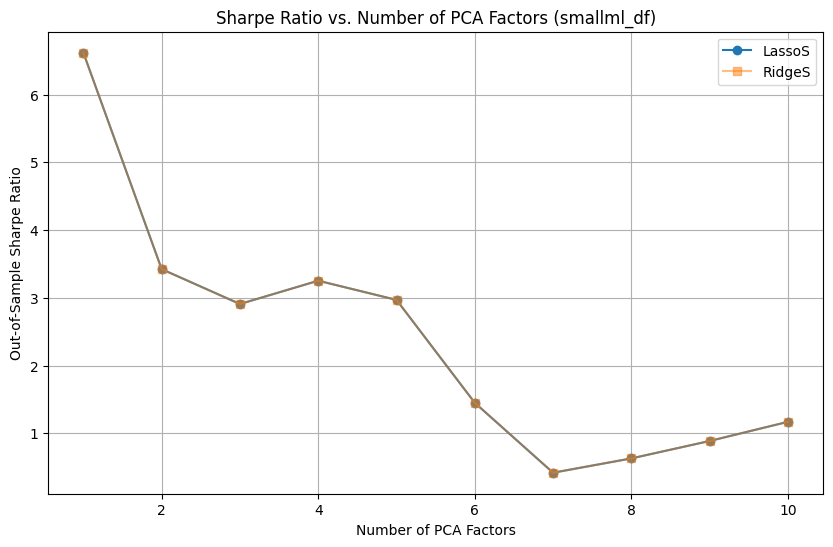

R^2 (Proportion of Variance Explained) for Each PC:
PC1: R^2 = 0.2440, Cumulative R^2 = 0.2440
PC2: R^2 = 0.1468, Cumulative R^2 = 0.3908
PC3: R^2 = 0.1073, Cumulative R^2 = 0.4982
PC4: R^2 = 0.0738, Cumulative R^2 = 0.5719
PC5: R^2 = 0.0597, Cumulative R^2 = 0.6316
PC6: R^2 = 0.0499, Cumulative R^2 = 0.6814
PC7: R^2 = 0.0490, Cumulative R^2 = 0.7305
PC8: R^2 = 0.0462, Cumulative R^2 = 0.7766
PC9: R^2 = 0.0430, Cumulative R^2 = 0.8196
PC10: R^2 = 0.0396, Cumulative R^2 = 0.8593


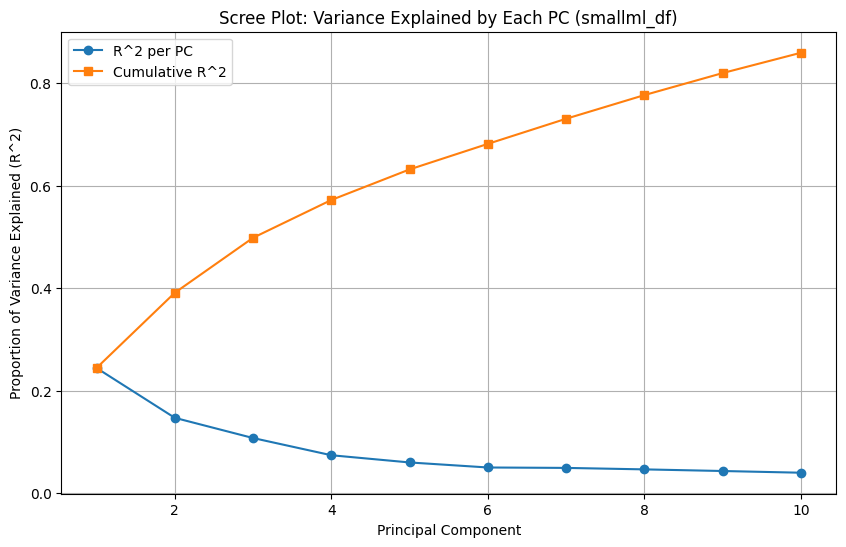

In [23]:
# === PCA, Lasso, Ridge for smallml_df ===

# Determine max factors (e.g., 95% variance or 10)
pca_tempS = PCA().fit(X_train_scaledS)
cum_varianceS = np.cumsum(pca_tempS.explained_variance_ratio_)
max_factorsS = min(np.searchsorted(cum_varianceS, 0.95) + 1, X_trainS.shape[1], 10)
factor_countsS = list(range(1, max_factorsS + 1))

# Initialize lists for Sharpe ratios
sharpe_lasso_listS = []
sharpe_ridge_listS = []

for n in factor_countsS:
    try:
        # PCA
        pcaS = PCA(n_components=n)
        X_train_pcaS = pcaS.fit_transform(X_train_scaledS)
        X_test_pcaS = pcaS.transform(X_test_scaledS)

        # Scale PCA factors
        scaler_factorsS = StandardScaler()
        X_train_pca_scaledS = scaler_factorsS.fit_transform(X_train_pcaS)
        X_test_pca_scaledS = scaler_factorsS.transform(X_test_pcaS)

        # Lasso and Ridge
        lassoS = LassoCV(cv=5, random_state=42).fit(X_train_pca_scaledS, y_trainS)
        ridgeS = RidgeCV(cv=5, alphas=[0.001, 0.01, 0.1, 1.0]).fit(X_train_pca_scaledS, y_trainS)

        # Normalize weights
        def normalize_weightsS(coef, model_name, n_factors):
            total = np.sum(np.abs(coef))
            if total < 1e-10:
                print(f"Warning: {model_name} coefficients sum to near zero for {n_factors} factors; using equal weights")
                return np.ones(len(coef)) / len(coef)
            return coef / total

        w_lassoS = normalize_weightsS(lassoS.coef_, "Lasso", n)
        w_ridgeS = normalize_weightsS(ridgeS.coef_, "Ridge", n)

        # Portfolio returns
        port_lassoS = pd.Series(X_test_pca_scaledS @ w_lassoS).rename(f'Lasso_{n}')
        port_ridgeS = pd.Series(X_test_pca_scaledS @ w_ridgeS).rename(f'Ridge_{n}')

        # Sharpe ratios
        def compute_sharpeS(returns, model_name, n_factors):
            mean = returns.mean() * 12
            std = returns.std() * np.sqrt(12)
            if std < 1e-10 or np.isnan(std):
                print(f"Warning: {model_name} portfolio has near-zero or NaN volatility for {n_factors} factors")
                return np.nan
            return mean / std

        sharpe_lasso = compute_sharpeS(port_lassoS, "Lasso", n)
        sharpe_ridge = compute_sharpeS(port_ridgeS, "Ridge", n)

        sharpe_lasso_listS.append(sharpe_lasso if not np.isnan(sharpe_lasso) else np.nan)
        sharpe_ridge_listS.append(sharpe_ridge if not np.isnan(sharpe_ridge) else np.nan)

    except Exception as e:
        print(f"Error for {n} factors: {e}")
        sharpe_lasso_listS.append(np.nan)
        sharpe_ridge_listS.append(np.nan)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(factor_countsS, sharpe_lasso_listS, marker='o', label='LassoS')
plt.plot(factor_countsS, sharpe_ridge_listS, marker='s', alpha=0.5, label='RidgeS')
plt.xlabel('Number of PCA Factors')
plt.ylabel('Out-of-Sample Sharpe Ratio')
plt.title('Sharpe Ratio vs. Number of PCA Factors (smallml_df)')
plt.legend()
plt.grid(True)
plt.show()

# Scree plot
pca_fullS = PCA()
pca_fullS.fit(X_train_scaledS)
r2_per_pcS = pca_fullS.explained_variance_ratio_
cum_r2S = np.cumsum(r2_per_pcS)

num_pcs_to_showS = min(len(r2_per_pcS), 10)
print("R^2 (Proportion of Variance Explained) for Each PC:")
for i in range(num_pcs_to_showS):
    print(f"PC{i+1}: R^2 = {r2_per_pcS[i]:.4f}, Cumulative R^2 = {cum_r2S[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_pcs_to_showS + 1), r2_per_pcS[:num_pcs_to_showS], marker='o', label='R^2 per PC')
plt.plot(range(1, num_pcs_to_showS + 1), cum_r2S[:num_pcs_to_showS], marker='s', label='Cumulative R^2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (R^2)')
plt.title('Scree Plot: Variance Explained by Each PC (smallml_df)')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

it got super interesting. for large cap dataset we get a small variation even with 10 PCs (aorund 39%) while with 10 PC we can explain 85% of the variance. however for all the datasets our sharpe ratio gets worse as we increase the number of PCs!


#### e.


ok so 1 PC is giving us the best Sharpe ratio and thus I will just apply that!
therefore I will just use PC1 in my ideal portfolio. there is also no difference between lasso and RR. so I just choose Lasso!
